In [18]:
import numpy as np
from matplotlib import pyplot as plt

## <span style="color:red"> **LECTURE 2** - Probability & Statistic I </span>

- PDF, CDF, quantile
- Real and empirical distributions
- Errors: heteroscedastic and homoscedastic
- Kolmogorov axioms and probability
- Bayes’ theorem
- Transformations of random variables

### **Probability Density Function (PDF), Cumulative Distribution Function (CDF), and Quantile**

- **PDF (Probability Density Function)**: Describes the probability for a continuous variable to take a specific value. The area under the PDF over an interval gives the probability of the variable falling within that interval.
- **CDF (Cumulative Distribution Function)**: It is obtained by integrating the PDF from - infinity up to a certain values X. Gives the probability that a random variable is less than or equal to a certain value. 

$$
H(x) = \int_{-\infty}^{x} h(x')\, dx'
$$


- **Quantile**: it's the inverse of the CDF. The value below which a certain percentage of observations fall. For example, the 0.25 quantile (or 25th percentile) is the value below which 25% of the data lie.

---

### **Empirical and Theoretical Distributions**

- **Theoretical Distribution**: A probability distribution derived from a known mathematical model (e.g., Normal, Poisson).
- **Empirical Distribution**: Based on observed data. It approximates the distribution of a dataset and is typically represented by the empirical CDF or histogram.
- Empirical distributions are used when the true distribution is unknown or difficult to model.

---

### **Homoscedastic and Heteroscedastic Errors**

- **Homoscedasticity**: The variance of the errors is constant.
- **Heteroscedasticity**: The error variance changes with the data

---

### **Kolmogorov's Axioms and Probability**

Kolmogorov formalized the foundation of probability with three axioms:

1. **Non-negativity**: For any event A, the probability is non-negative:  
   \( P(A) >= 0 \)
2. **Normalization**: The probability of the entire sample space is 1:  
   \( P($\Omega$) = 1 \)
3. **Additivity**: For any two mutually exclusive events A and B:  
   \( P(A $\cup$ B) = P(A) + P(B) \)

These axioms form the basis of modern probability theory.

---

### **Bayes' Theorem**

Bayes' Theorem updates the probability of a hypothesis based on new evidence:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

-  P(A|B) : Posterior probability (updated belief)  
-  P(B|A) : Likelihood of observing B given A  
-  P(A) : Prior probability of A  
-  P(B) : Marginal probability of B. We can write the marginal probability of x as:   $ p(x) = \int p(x,y) dy = \int p(x|y)p(y)dy$

Used in many fields like medicine, machine learning, and decision theory.

### Example: COVID Test

Suppose:
- 1% of the population has COVID:  **P(COVID) = 0.01**
- The test is 99% sensitive:  **P(Positive | COVID) = 0.99**
- The test is 95% specific:  **P(Negative | No COVID) = 0.95**, so **P(Positive | No COVID) = 0.05**

We want to find the probability that someone actually has COVID **given that they tested positive**, i.e., **P(COVID | Positive)**.

**Apply Bayes' Theorem:**

$$
P(\text{COVID} | \text{Positive}) = \frac{P(\text{Positive} | \text{COVID}) \cdot P(\text{COVID})}{P(\text{Positive})}
$$

We compute the denominator using the law of total probability:

$$
P(\text{Positive}) = P(\text{Positive} | \text{COVID}) \cdot P(\text{COVID}) + P(\text{Positive} | \text{No COVID}) \cdot P(\text{No COVID})
$$

Plug in the numbers:

$$
P(\text{Positive}) = 0.99 \cdot 0.01 + 0.05 \cdot 0.99 = 0.0099 + 0.0495 = 0.0594
$$

Now compute the posterior:

$$
P(\text{COVID} | \text{Positive}) = \frac{0.99 \cdot 0.01}{0.0594} \approx \frac{0.0099}{0.0594} \approx 0.1667
$$

**Interpretation:**
Even after testing positive, the probability that the person actually has COVID is only **~16.7%**. This highlights the importance of considering base rates (prior probabilities) when interpreting test results.

---

### **Transformations of Random Variables**

Transforming a random variable means applying a function to it to create a new variable. This is useful when we want to study the distribution of a quantity that depends on a known random variable.

#### **Basic Idea**

Let $X$ be a continuous random variable with known probability density function (PDF) $f_X(x)$, and let $Y = g(X)$ be a transformation of $X$. If the function $g$ is **invertible and differentiable**, then the PDF of $Y$, denoted $f_Y(y)$, is given by:

$$
f_Y(y) = f_X(g^{-1}(y)) \cdot \left| \frac{d}{dy} g^{-1}(y) \right|
$$

This formula adjusts the density according to how the transformation stretches or compresses the space.

To find the probability density function of the transformed variable $Y = g(X)$, take the value of the original density function $f_X$ at the inverse of the transformation $g^{-1}(y)$, and multiply it by the **absolute value of the derivative** of that inverse function with respect to $y$.


#### **Example: Squaring a Uniform Variable**

Let $X \sim \text{Uniform}(0, 1)$

Now define $Y = X^2$. We want to find the distribution of $Y$.

- Invert the transformation: $X = \sqrt{Y}$
- Compute the derivative: $\frac{d}{dy} \sqrt{y} = \frac{1}{2\sqrt{y}}$

Now apply the change-of-variable formula:

$$
f_Y(y) = f_X(\sqrt{y}) \cdot \left| \frac{1}{2\sqrt{y}} \right| = \begin{cases}
\frac{1}{2\sqrt{y}} & \text{if } 0 \leq y \leq 1 \\
0 & \text{otherwise}
\end{cases}
$$

The transformed variable $Y = X^2$ has a distribution that is concentrated more near 0 than near 1, even though $X$ was uniform. This shows how transformations can significantly affect the shape of a distribution.


## <span style="color:red"> **LECTURE 3** - Probability & Statistic II </span>

- Monte Carlo integration (crude / hit-or-miss/ importance sampling)  
- Mean, median, and expected value  
- Standard deviation, MAD1, variance, MAD2, quantile region, interquantile range, mode  
- Skewness  
- Kurtosis  
- Statistics of the PDF and sample; Bessel’s correction  
- Uncertainties of estimators  
- PDFs: uniform, Gaussian, log-normal, chi-squared, Poisson   

### **Monte Carlo Integration**

**Monte Carlo methode** uses random generated number to approximate matemathical and physical problem, such as integration.
- **Crude Monte Carlo**:  
  Estimate the integral $\int_a^b f(x) \, dx$ by sampling $x_i \sim \mathcal{U}(a, b)$ and computing:  
  $$
  I \approx (b - a) \cdot \frac{1}{N} \sum_{i=1}^N f(x_i)
  $$
- **Hit-or-Miss method**:  
  Sample uniformly in a rectangle that encloses the graph of $f(x)$.  
  The integral is approximated by the fraction of points that fall below the curve times the area of the rectangle.

-  **Importance Sampling**
    - Hit or miss and Crude MC, are inefficient if the integrand has some null zone, or even if is really extendended... that's beacuse this 2 methode  use the uniform distribution.
    - Instead of sampling from the uniform, sample from a **proposal distribution** $g(x)$ 
    - Best when $g(x)$ is close to the shape of $f(x)$.
    - Reduces variance and computational cost if the $g(x)$ it's well chosen
---

### **Mean, Median, Expected Value, and Mode**

KEEP ATTENTION AT THE DIFFERENT USE OF $\bar{x}$ AND $\mu$

- **Mean**: Arithmetic average of a dataset. $\mu = \mathbb{E}[X]$, Where X will denote an entire dataset.
- **Median**: Middle value when data are ordered. Less sensitive to outliers.
- **Expected value** $\mathbb{E}[X]$ : Theoretical mean of a random variable. For continuous variables:  
  $$
  \mathbb{E}[X] = \int x f(x) \, dx
  $$
- **Mode**: Most frequent value in a dataset.

---

### **Standard Deviation, Variance, MAD, Quantiles, and IQR**

- **Variance** (2nd-order moment):  
  $$
  \sigma^2 = \text{Var}(X) = \mathbb{E}[(X - \mu)^2] = \int_{-\infty}^{+\infty}(x - \mu)^2 f(x) \, dx
  $$
  f(x) is the probability density function (PDF) of the continuous random variable x
- **Standard Deviation** $\sigma$: Measures spread around the mean. It is the square root of the variance:
  $$
  \sigma = \sqrt{\text{Var}(X)} = \sqrt{\sigma^2}
  $$
- **MAD_1 (Mean Absolute Deviation)**:  
  $$
  \text{MAD}_1 = \frac{1}{N} \sum_{i=1}^N |x_i - \bar{x}|
  $$
  Note: this is not differentiable at  x = 0 , so it's sometimes avoided in optimization.
- **MAD_2 (Median Absolute Deviation)**:  
  $$
  \text{MAD}_2 = \frac{1}{N} \sum_{i=1}^N |x_i - M|
  $$
  where M is the median.
- **Quantile region**: Range containing a central portion of the distribution (e.g., 95% interval).
- **Interquantile Range (IQR)**:  
  $$
  \text{IQR} = Q_{75} - Q_{25}
  $$
  Contains the central 50% of the data.

---

### **Skewness and Kurtosis**

- **Skewness**: Measures asymmetry of a distribution (3rd-order moment).  
  - Positive skew: tail to the right.  
  - Negative skew: tail to the left.  
  - Formula:
    $$
    \text{Skewness} = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{x_i - \bar{x}}{\sigma} \right)^3
    $$
- **Kurtosis**: Measures how likely extreme values (far from the mean) are (4th-order moment).  
  - High kurtosis: heavy tails.  
  - Low kurtosis: light tails.  
  - Normal distribution has kurtosis = 3.  
  - Formula:
    $$
    \text{Kurtosis} = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{x_i - \bar{x}}{\sigma} \right)^4
    $$

---

### **PDFs: Uniform, Gaussian, Log-Normal, Chi-Squared, Poisson**

This section summarizes key properties of common probability distributions.


####  **Uniform Distribution**  (on $[a, b]$)

- **PDF**:  
  $$
  f(x) = \frac{1}{b - a}, \quad \text{for } x \in [a, b]
  $$
- **Mean**: $\mu = \frac{a + b}{2}$
- **Variance**: $\sigma^2 = \frac{(b - a)^2}{12}$
- **Skewness**: 0 (symmetric)
- **Kurtosis** (excess): $-1.2$



####  **Gaussian (Normal) Distribution**  ($X \sim \mathcal{N}(\mu, \sigma^2)$)

- **PDF**:  
  $$
  f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \, e^{-\frac{(x - \mu)^2}{2\sigma^2}}
  $$
- **Mean**: $\mu$
- **Variance**: $\sigma^2$
- **Skewness**: 0 (perfectly symmetric)
- **Kurtosis** (excess): 0

Notes:
- The sum (or convolution) of two Gaussian variables is still Gaussian.
- Called the "queen of distributions" — many natural phenomena approximate a normal distribution due to the Central Limit Theorem.
- Probability within:
  - $1\sigma$: ~68%
  - $2\sigma$: ~95%
  - $3\sigma$: ~99.7%


#### **Chi-Squared Distribution** ($X \sim \chi^2(k)$)

- Defined as:  
  $$
  X = \sum_{i=1}^k \left( \frac{x_i - \mu}{\sigma} \right)^2
  $$
- **Mean**: $\mu = k$
- **Variance**: $\sigma^2 = 2k$
- **Skewness**: $\sqrt{8/k}$
- **Kurtosis** (excess): $12/k$
- **What is $k$?**
    - $k$ is the number of **degrees of freedom** (DOF).
    - It typically corresponds to the number of **independent standardized variables** being squared and summed.
    - For example, in hypothesis testing, $k$ is often the number of data points **minus the number of fitted parameters**.


#### **Reduced Chi-Squared ($\chi^2_{\text{red}}$)**

When evaluating the goodness-of-fit of a model, it's common to compute the **reduced chi-squared**:

$$
\chi^2_{\text{red}} = \frac{\chi^2}{k} = \frac{1}{k} \sum_{i=1}^N \left( \frac{y_i - f(x_i)}{\sigma_i} \right)^2
$$

Where:
- $\chi^2$ is the total chi-squared statistic.
- $k = N - p$ is the degrees of freedom (number of data points $N$ minus number of fitted parameters $p$).
- $f(x_i)$ is the model prediction for data point $i$.
- $\sigma_i$ is the uncertainty on $y_i$.


#### **Poisson Distribution** ($X \sim \text{Poisson}(\mu)$)

- **PMF**:  
  $$
  P(k; \mu) = \frac{\mu^k e^{-\mu}}{k!}, \quad k = 0, 1, 2, \dots
  $$
- **Mean**: $\mu$
- **Variance**: $\mu$
- **Skewness**: $\frac{1}{\sqrt{\mu}}$
- **Kurtosis** (excess): $\frac{1}{\mu}$

Models counts of rare events in fixed intervals (e.g., radioactive decay, emails per hour).





## <span style="color:red"> **LECTURE 4** - Probability & Statistic III </span>

- Central Limit Theorem  
- Law of Large Numbers  
- Multidimensional PDFs (mean, sigma x and y, covariance, correlation coefficient, principal axes, 2D confidence level)  
- Correlation vs causation (Pearson, Spearman, Kendall)  
- Rejection sampling  
- Inverse sampling  

### **Central Limit Theorem (CLT)**

The CLT states that the sum (or mean) of a large number of independent, identically distributed random variables tends to follow a **normal distribution**, regardless of the original distribution.
This theoreme is the faundation for the repeated measurments .

---

### **Law of Large Numbers (LLN)** (Bernoulli's theoreme)

- The LLN states that as the number of observations $N$ increases, the sample mean $\bar{x}$ converges to the true mean $\mu$, this is also valid fot the variance:
  $$
  \lim_{N \to \infty} \bar{x} = \mu \quad, \quad \lim_{N \to \infty} s = \sigma
  $$
- This is a statement about convergence **in probability**.

---

### **Multidimensional PDFs**

- In 2D, the joint distribution can be described by:
  - **Mean vector**:  
    $$
    \vec{\mu} = (\mu_x, \mu_y)
    $$
    where, ofcourse, $\mu_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x h(x,y) dx dy$
  - **Covariance matrix**:  
    $$
    \Sigma = \begin{pmatrix}
    \sigma_x^2 & \text{cov}(x, y) \\
    \text{cov}(y, x) & \sigma_y^2
    \end{pmatrix}
    $$
    The two off diagonal values are equal to 0 only if x & y are totaly uncorrelated.
    $$\sigma^2_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x)^2 h(x,y) dx dy$$
    $$\sigma_{xy} = Cov(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x) (y-\mu_y) h(x,y) dx dy$$

<p align="center">
  <img src="immagini/negative-and-positive-covariance.png" alt="boh" width="600"/>
</p>

  - **Correlation coefficient**:  
    $$
    \rho = \frac{\text{cov}(x, y)}{\sigma_x \sigma_y}
    $$
    Express the percentual of correlation between the 2 variable

  - **Principal axes**: determined by the eigenvectors of $\Sigma$; note that the correlation vanish in this system by definition.
  - **2D Confidence Ellipses**: regions where the joint probability is constant, keep attention, for each dimension the number of sigma has a different meaning: $1\sigma = 39$% in 2 dimension! I can impose 68% for the similitude with 1D, but it's not $1\sigma$.

  Outliers can bias these estimates and that it may be more appropriate to use the median rather than the mean as a more robust estimator for $\mu_x$ and $\mu_y$

- **Marginalized PDFs**

    If you have the joint PDF $h(x, y)$, you can obtain the **marginal distribution** of one variable by **integrating out** the other:

    - Marginal PDF of $x$:
      $$
      f_X(x) = \int_{-\infty}^{\infty} h(x, y) \, dy
      $$

    These marginalized PDFs describe the individual behavior of each variable, regardless of the other.
---


### **Correlation vs Causation**

Correlation does not imply causation!
Just because the sun burns our skin and also makes us thirsty, it doesn't mean that thirst causes sunburn!

- **Pearson's coefficient** ($r$) : Measures linear correlation between 2 different dataset; it's a value between -1 and 1, the 2 are uncorrelated only if r = 0.
It has 2 problems:
  - it's susceptible at the outliars
  - doesn't count the error

- **Spearman's coefficient** ($r_s$): Measures monotonic (rank-based) correlation.
- **Kendall's coefficient** ($\tau$): Measures ordinal association between two variables.

---

### **Rejection Sampling**

Rejection sampling is a method to generate random samples from a complex distribution $h(x)$, using a simpler proposal distribution $q(x)$.

The procedure works as follows:

1) Decide on a straightforward *proposal distribution* $q(x)$ to propose new samples. It should be wide enough to capture the tails of $h(x)$. Usually used a uniform distribution.

2) Generate a random sample from $q(x)$, $x_i$.

3) Now generate a random sample, $u$, from a uniform distribution in the range $[0,\mathrm{max}(h(x))]$, where the upper bound should be as large or larger than the maximum density of $h(x)$. (This could be worked out analytically or by histograming the data.)

4) If $u\leq h(x_i)$ accept the point, or else reject it and try again from step 2.

The set of accepted $x$ values will follow the target distribution $p(x)$.

### **Inverse Transform Sampling**
Rejection sampling works, but wouldn't it be awesome if we didn't have to discard *any* points during our sampling? This is the power and simplicity of **inverse transform sampling**.

- Used to sample from a distribution $h(x)$ with known CDF $H(x)$ and Quantile.
- Steps:
  1. Sample $u$ from  ${U}(0, 1)$.
  2. Using the quantile function $H^{-1}(x)$, find the value of $x$ below which a fraction $u$ of the distribution is contained.
  3. The $x$ value you get is a random sample from $h(x)$


Normalizarion here are rellly important.
you can retrive the quantile and the CDF by numerically solution if you are not able to do in by hand.

## <span style="color:red"> **LECTURE 5** - Frequentist Inference I </span>

- Population  
- Sample  
- Statistics  
- Estimators  
- Uncertainties and intervals  
- Frequentist vs Bayesian  
- Maximum Likelihood Estimator (MLE)  
- Properties of estimators  
- Likelihood  
- Chi-squared  
- Minimization  
- Mean and error of MLE with heteroscedastic and homoscedastic errors  
- Non-Gaussian likelihoods 

### **Population, Sample, Statistic, Estimators, Uncertainty and Intervals**

- A **population** is the full set of data or measurements we are interested in.
- A **sample** is a subset of the population, used to infer properties of the whole.
- A **statistic** is a function of the sample (e.g. the sample mean $\bar{x}$).
- An **estimator** is a rule or formula to estimate population parameters from the sample.
- All estimators have **uncertainties** due to random sampling.
- A **confidence interval**, gives a range likely to contain the true value.

---

### **Frequentist vs Bayesian**

- **Frequentist**: Probability is extract from the frequency of events. Parameters are fixed, data are random.
Into Frequentist inference we have confidence levels,.
- **Bayesian**: Probability expresses belief or uncertainty about what we know. Parameters have distributions while data are fixed. In Bayesian inference we have credible regions derive from posterior distribution of the parameters.


- Bayesian statistic it's hold by the **Bayes’ theorem**:
  $$
  P(\theta | \text{data}) = \frac{P(\text{data} | \theta) \cdot P(\theta)}{P(\text{data})}
  $$
  where $\theta$ are the parameters.
    -  $P(\theta | \text{data})$ : Posterior probability (updated belief)  
    -  $P(\text{data} | \theta)$ : Likelihood of observing data given the parameter  
    -  $P(\theta)$ : Prior probability  
    -  $P(data)$ : Marginal probability 



---

### **Maximum Likelihood Estimator (MLE)**

- The **MLE** is the value of the parameter $\theta$ that **maximizes the likelihood** of the observed data:
  $$
  \hat{\theta}_{\text{MLE}} = \arg \max_\theta \mathcal{L}(\theta)
  $$
- It's usefull in both frequentist e bayesian approach
- **Remember**: the **likelihood** is defined as the product of the probabilities (or probability densities) of the observed data, assuming a given model or parameter value.

  For independent data points $x_1, x_2, ..., x_N$:

  $$
  \mathcal{L}(\theta) = \prod_{i=1}^{N} p(x_i \mid \theta)
  $$

  Where:
  - $\mathcal{L}(\theta)$ is the likelihood function,
  - $p(x_i \mid \theta)$ is the probability (or density) of observing $x_i$ given parameter $\theta$,
  - The product assumes all $x_i$ are independent.

  Often, we work with the **log-likelihood**:
  $$
  \log \mathcal{L}(\theta) = \sum_{i=1}^{N} \log p(x_i \mid \theta)
  $$
  which is easier to compute and optimize.

**Remember how this works:**
You have a likelihood function (or log-likelihood).
The values $x_i$ are known (observed data), but the parameters $\theta$ are unknown.
You use an algorithm (e.g., grid search, gradient ascent, or scipy.optimize) to:
Try many values of $\theta$, then compute the likelihood (or log-likelihood) for each value, and plot the result over the values of theta. Find the one that maximizes it




12.1010101010101


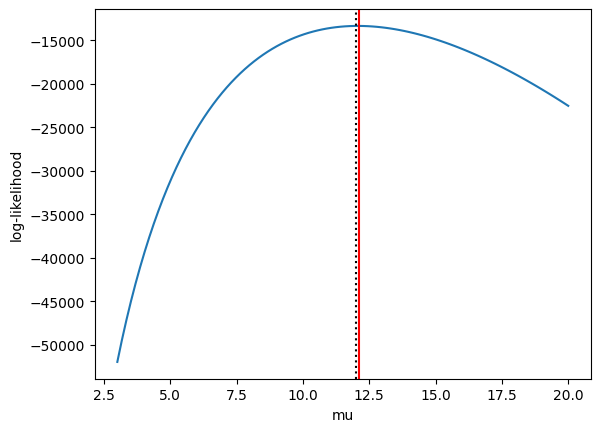

In [19]:
from scipy.stats import poisson

poisson_data = poisson.rvs(12, size=5000)

# Scan across 1000 possible mu values from 3 to 20.
mu_proposed = np.linspace(3,20,100)

# compute the ln(L) for each possible mu.
lnL_scan = []
for mu in mu_proposed:
    lnL_temp = poisson.logpmf(poisson_data, mu=mu) # gives you the log prob. density; useful!
    lnL_temp = np.sum(lnL_temp) # sum over the log pmf of all data points
    lnL_scan.append( lnL_temp )
    
# convert to numpy array
lnL_scan = np.array(lnL_scan)

# mu_proposed that maximizes the lnL.
plt.plot(mu_proposed,lnL_scan)

findmax = mu_proposed[np.argmax(lnL_scan)]
print(findmax)
plt.axvline(findmax,c='red')
plt.xlabel("mu")
plt.ylabel("log-likelihood")

plt.axvline(12,c='black',ls='dotted')


### **Properties of Estimators**

- **Unbiasedness**: $\mathbb{E}[\hat{\theta}] = \theta$
- **Consistency**: $\hat{\theta} \to \theta_{true}$ as $N \to \infty$
- **Normality** : As $N \to \infty$ , the distribution of the estimator approaches a normal distribution.
- **Efficiency**: Minimum possible variance (called Cramer -Rao bound)

---

### **Likelihood, Chi-squared and Minimization**

- The **likelihood** $\mathcal{L}(\theta)$ is the probability of the data given parameters. $P(data | \theta)$
- Suppose you have data points $(x_i, y_i)$ with known uncertainties $\sigma_i$, and a model $f(x_i; \theta)$ depending on parameters $\theta$.
      Each measurement $y_i$ is modeled as:
    $$
    y_i = f(x_i; \theta)
    $$

    So the probability density of observing $y_i$ given $\theta$ is:
    $$
    p(y_i \mid \theta) = \frac{1}{\sqrt{2\pi \sigma_i^2}} \, \exp\left( -\frac{(y_i - f(x_i;\theta))^2}{2\sigma_i^2} \right)
    $$

    the total likelihood is the product over all data points:
  $$
  \mathcal{L}(\theta) = \prod_{i=1}^N p(y_i \mid \theta)
  $$

  Taking the log:
  $$
  \log \mathcal{L}(\theta) = -\frac{1}{2} \sum_{i=1}^N \left[ \log(2\pi \sigma_i^2) + \frac{(y_i - f(x_i;\theta))^2}{\sigma_i^2} \right]
  $$

  The first term is constant if $\sigma_i$ are known.  
  So **maximizing the log-likelihood** is equivalent to **minimizing** the second term

- the Likelihood will follow the $\exp(-\chi^2/2)$
- In Gaussian cases, maximizing the log-likelihood is equivalent to **minimizing the chi-squared**:
  $$
  \chi^2 = \sum_{i=1}^N \left( \frac{x_i - f(x_i; \theta)}{\sigma_i} \right)^2
  $$
- Minimizing $\chi^2$ gives the best-fit parameters.
- The MLE method tell us to think the likelihood as a function of the (unknown) model parameters, and by minimizing the $\chi^2$, we will find the values that maximize the values of the likelihood.

---

### **Mean and MLE Error: Homoscedastic vs Heteroscedastic**

- **Homoscedastic**: All data points have the same uncertainty $\sigma$. If we minimize the $\chi^2$ distribution, we will retrived the **sample mean**:
    $$
    \bar{x} = \frac{1}{N} \sum x_i \quad \text{and} \quad \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}}
    $$
- **Heteroscedastic**: Uncertainties vary for each data point $\sigma_i$. Then you will retrive the **weighted mean**:
    $$
    \bar{x} = \frac{\sum x_i / \sigma_i^2}{\sum 1 / \sigma_i^2}
    $$
    $$
    \sigma_{\bar{x}}^2 = \frac{1}{\sum 1/\sigma_i^2}
    $$
This two formula are extracted from the derivative of the log-Likelihood = 0 , that' because we are searching for a maximum.

Our Maximum Likelihood Estimator (MLE) is not perfect — every estimate has an associated **uncertainty** due to the finite sample size.

Under general conditions, the MLE becomes **asymptotically normal**, meaning that for large $N$, the likelihood function can be approximated by a **Gaussian** centered at the true parameter value $\theta_0$.

To quantify the uncertainty, we expand the **log-likelihood** around its maximum using a second-order **Taylor expansion**:

$$
\log \mathcal{L}(\theta) \approx \log \mathcal{L}(\hat{\theta}) - \frac{1}{2} (\theta - \hat{\theta})^2 F(\hat{\theta})
$$

Here, $F(\hat{\theta})$ is the **Fisher Information Matrix**, defined as the negative second derivative (Hessian) of the log-likelihood:

$$
F(\theta) = - \frac{\partial^2}{\partial \theta^2 } \log \mathcal{L}(\theta)
$$

The **covariance matrix** of the estimator $\hat{\theta}$ is then given by the **inverse** of the Fisher matrix (the Fisher Information tells you how "sharp" (peaked) the likelihood is around its maximum.
The inverse of that sharpness gives the spread (uncertainty) — which is exactly the variance (or covariance, in multiple dimensions) of your estimator.):

$$
\text{Cov}(\hat{\theta}) = F^{-1}(\hat{\theta})
$$

For a **single parameter** $\theta$, this simplifies to:

$$
\sigma_{\hat{\theta}} = \sqrt{\frac{1}{F(\hat{\theta})}}
$$

---

### **Non-Gaussian Likelihoods**

- When the data doesn’t follow a Gaussian distribution, use the appropriate **likelihood model**, such as : **Poisson**, **Binomial**, **Exponential**, **Log-normal**, etc.
- The MLE approach still applies: choose the model, write the likelihood, and maximize it numerically.
- In most of the cases, you will find the same result as in the gaussian one

## <span style="color:red"> **LECTURE 6** - Frequentist Inference II </span>

- Fit  
- Outliers (Huber loss function)  
- Goodness of fit  
- Reduced chi-squared  
- Model misspecification  
- Occam’s Razor  
- AIC (Akaike Information Criterion)  
- Bootstrap  
- Jackknife

### **Fit**

- Fitting means adjusting model parameters so that the model best matches the observed data.
- Typically done by minimizing a **loss function**, such as the **sum of squared residuals** or **negative log-likelihood**.
- The goal is to find the best estimate $\hat{\theta}$ that explains the data.

---

### **Outliers and Huber Loss Function**

- **Outliers** are data points that deviate significantly from the trend of the rest of the data.
- Summing the squares of the residuals ($\chi^2=\sum_{i=1}^N (y_i - M(x_i))^2/\sigma^2$) is sensitive to outliers
- How do we deal with outliers? By modifying the likelihood!
- The **Huber loss** combines the squared loss for small errors and absolute loss for large errors:

$$
L_{\text{Huber}}(t) =
\begin{cases}
\frac{1}{2} t^2 & \text{if } |t| \leq c \\
c |t| - \frac{1}{2} c^2 & \text{if } |t| > c
\end{cases}
$$

- Where $t = \left| \frac{y - M(\theta)}{\sigma} \right|$ represents the **standardized residual**, i.e. how far the observed value $y$ is from the model prediction $M(\theta)$, in units of the known uncertainty $\sigma$.
- $c$ is the **tuning constant** (or confidence threshold), which determines the cutoff point where the loss switches from quadratic to linear. A common value is $c \approx 1.345$, which gives good balance between efficiency and robustness under normal errors.
- This approach makes the fit more **robust** to outliers: small residuals behave like in least squares, but large residuals are penalized less harshly.
- Note that by doing this, we are effectively putting **prior information** into the analysis... infact, in a frequentist approach we prefear to re-do the measurments ore simply delete the few outliars.

![title](https://upload.wikimedia.org/wikipedia/commons/c/cc/Huber_loss.svg)

---

### **Goodness of Fit : Reduced Chi-squared**

- Measures how well the model describes the data. Remember GIGO (Garbage In Garbage Out), if the model is wrong , finding the "best" parameter doesn't really mean something ...
- A good fit should show residuals randomly scattered around zero.

- The **reduced chi-squared** is defined as:

  $$
  \chi^2_{\text{red}} = \frac{1}{\nu} \sum_{i=1}^N \left( \frac{y_i - f(x_i)}{\sigma_i} \right)^2
  $$

  where **$\nu = N - k$** is the number of **degrees of freedom** (data points minus number of parameters).

- Interpretation:
  - $\chi^2_{\text{red}} \approx 1$: good fit
  - $\chi^2_{\text{red}} \gg 1$: underfitting or underestimated errors
  - $\chi^2_{\text{red}} \ll 1$: overfitting or overestimated errors
- If the model is **wrong** (misspecified), goodness-of-fit measures can be misleading.

---

### **Model Comparison, Occam’s Razor , AIC and BIC**
- You can't do $\chi^2_{\text{red}}$ with Huber function, because it's not gaussian! We have to find other possibilities...
- When comparing two models with the **same number of parameters**, we can simply compare their **maximum log-likelihood** values:
- Larger log-likelihood ⇒ better fit

The **Huber loss** clearly performs better (less negative log-likelihood), meaning it fits the data more effectively, especially in the presence of outliers.


When models have **different numbers of parameters**, simply comparing likelihoods is not fair: more complex models might fit better **just by chance**. We need to penalize complexity — this is known as the **Occam penalty**.


A simple method to compare models with different complexity is the **AIC** (Akaike Information Criterion):
  
- Lower AIC is better for the explaination of the dataset
- It's composed by lot of term, the first one it's the $\chi^2$, the second and third penalize model complexity
- If models fit the data equally well, AIC prefers the one with fewer parameters.



The **BIC** (Bayesian Information Criterion) is another way to compare models, especially when they have different numbers of parameters.
It’s similar to AIC, but it **penalizes complex models more strongly**, especially when the dataset is large.


- Lower **BIC** means a better model.
- BIC prefers **simpler models**, especially when N is large.
- It’s often used in **Bayesian statistics**, but doesn’t need a full Bayesian analysis, often use in frequentist analysis too.


---

### **Bootstrap**

- A **resampling method** to estimate uncertainties and confidence intervals.
- Keep attention : it create information out of nothing!
- Steps:
  1. Resample data (with replacement) to create many datasets. 
    The probability of getting the original dataset it's extreamly low ($N! / N^N$)
  2. Fit the model to each resampled dataset.
  3. Analyze the distribution of the fitted parameters.
- Useful when analytical uncertainty is hard to compute or it's too big (such as when we have few point for a gaussian distribution).

---

###  **Jackknife Method** 

The **Jackknife** is a method to estimate the **uncertainty** (standard error) and **bias** of a statistic — like the **mean** or **standard deviation** — using your data.

Suppose you have a dataset of $N$ values.

1. Leave out **one** data point at a time → you get $N$ new datasets containing (N-1) points.
2. Compute your statistic (e.g. mean, std) on each of these.
3. From the $N$ results, estimate:
   - A **better (bias-corrected)** value of the statistic
   - The **uncertainty** on that value


Jackknife works **well** when the statistic is:
- The **mean**
- The **standard deviation**

It works **poorly** for:
- The **median**
- **Quantiles** (e.g. the 25th percentile)

These are called **rank-based statistics**, and removing one point at a time doesn’t change them much — so the jackknife underestimates the uncertainty.


####  **Jackknife vs Bootstrap**

|                | Jackknife                | Bootstrap                |
|----------------|--------------------------|--------------------------|
| Type           | Leaves out one point     | Resamples with replacement |
| Fast?          | ✅ Yes                   | ❌ Slower               |
| Repeatable?    | ✅ Always same result     | ❌ Changes each time    |
| Works for all stats? | ❌ Not for medians       | ✅ Yes                 |
| Confidence intervals | ❌ Approximate         | ✅ Full distribution     |


## <span style="color:red"> **LECTURE 7** - Frequentist Inference III </span>

- Hypothesis testing (p-value)  
- Null hypothesis  
- Type I and Type II errors  
- KS test (Kolmogorov–Smirnov)  
- Histograms  
- Number of bins (Scott’s & Freedman–Diaconis rules)  
- Rug plot  
- Kernel Density Estimation (Gaussian and Epanechnikov)  

### **Hypothesis Testing and p-value**

Hypothesis testing is a fundamental procedure in statistics used to decide whether there is enough evidence in a sample of data to infer that a certain condition holds for the entire population.

- **Null Hypothesis ($H_0$):** This is the starting assumption or the default claim about the population. It usually represents the idea that there is **no effect**, **no difference**, or **no relationship** between variables. For example, $H_0$ might state that the mean of a population is equal to a specific value.

- **Alternative Hypothesis ($H_1$):** This is the hypothesis you want to test or provide evidence for. It represents a change, effect, or difference from what the null hypothesis states. 

- **Test Statistic:** To test the hypotheses, a test statistic is computed from the sample data. This statistic measures how far the observed data are from what would be expected if $H_0$ were true. Different tests have different statistics (e.g., t-test, z-test, chi-square test).

- **p-value:** The p-value is the probability, assuming the null hypothesis $H_0$ is true, of obtaining a test statistic at least as extreme as the one observed. In other words, it quantifies how likely your data would be if there were actually no effect.

  - A **small p-value** indicates that the observed data is unlikely under $H_0$, so we have evidence to reject the null hypothesis.
  - A **large p-value** suggests the data is consistent with $H_0$, and we do not reject it.

    $$
        p_i = \int_{x_i}^{\infty} h_0(x)dx = 1 - \int_{-\infty}^{x_i}h_0(x)dx = 1- H_0(x_i)
    $$

- **Significance Level ($\alpha$):** This is a threshold probability set before the test (commonly 0.05 or 5%). If the p-value is less than $\alpha$, the result is called statistically significant, and we reject the null hypothesis in favor of the alternative.


#### Important notes:

- **Failing to reject $H_0$ is not the same as accepting $H_0$.** It means the data do not provide strong enough evidence against $H_0$, but $H_0$ might still be false.
- The p-value does **not** measure the probability that $H_0$ is true or false; it only measures data compatibility with $H_0$.

#### Example:

Suppose you want to test if a coin is fair.  
- $H_0$: The coin is fair (probability of heads = 0.5).  
- $H_1$: The coin is biased (probability of heads ≠ 0.5).

You flip the coin 100 times, get 60 heads, and compute a test statistic. The p-value tells you how likely it is to get 60 or more heads assuming the coin is fair. If the p-value is below your threshold (e.g., 0.05), you reject $H_0$ and conclude the coin is likely biased.

![download.jpg](attachment:download.jpg)

--- 
### **Facts about p-value**
1) Not the chance the hypothesis is true:
A p-value does not tell you the probability that the null hypothesis is true. Instead, it tells you how likely your results are if the null hypothesis were true.

2) Not the chance it's "just random":
A p-value is not the probability that your results happened by chance alone. It's based on the assumption that the null hypothesis is correct and measures how well your data fit that assumption.

3) The 0.05 rule is just a guideline:
The 0.05 cutoff for “significance” is a tradition, not a scientific rule. A result just below or above 0.05 should not be seen as automatically meaningful or meaningless.

4) Doesn’t tell how big or important an effect is:
A small p-value doesn’t mean the effect is big or important. Even tiny effects can be “significant” if the sample is large enough — that’s why we also need to consider effect size.
---

### **Type I and Type II Errors**

**TYPE I ERRORS (false positives, or false alarms)**

- The null hypothesis is true, but incorrectly rejected.
- False positive probability is dictated by the significance level $\alpha$. 

aka *That pixel was just background but I think it's a real source.*

**TYPE II ERRORS (false negatives, or false dismissals)**

- The null hypothesis is false, but not rejected.
- False negatives probability is dictated by a variable called $\beta$, related to $(1-\beta)$, called the ***detection probability***.

aka *That was a real galaxy but I missed it!*

For a sample of size $N$ (containing background noise and sources), the **expected number of spurious sources (Type I / false positives)** is 

$$ n_\mathrm{spurious} = N(1-a)\alpha = N(1-a)\int_{x_c}^\infty h_B(x)dx$$ 

and the **expected number of missed sources (Type II / false negatives)** is

$$ n_\mathrm{missed} = Na\beta = Na\int_0^{x_c}h_S(x)dx.$$

The **total number of classified sources** (that is number of instances where we reject the null hypothesis) is

$$ n_\mathrm{source} = Na - n_\mathrm{missed} + n_\mathrm{spurious} = N[(1-\beta)a + (1-a)\alpha].$$

The **sample completeness** (or **detection probability**) is defined as

$$ \eta = \frac{Na - n_\mathrm{missed}}{Na} = 1-\int_0^{x_c}h_S(x)dx = 1-\beta$$

Finally, the **sample contamination** is

$$ \epsilon = \frac{n_\mathrm{spurious}}{n_\mathrm{source}}$$

where $(1-\epsilon)$ is sometimes called the **classification efficiency**.




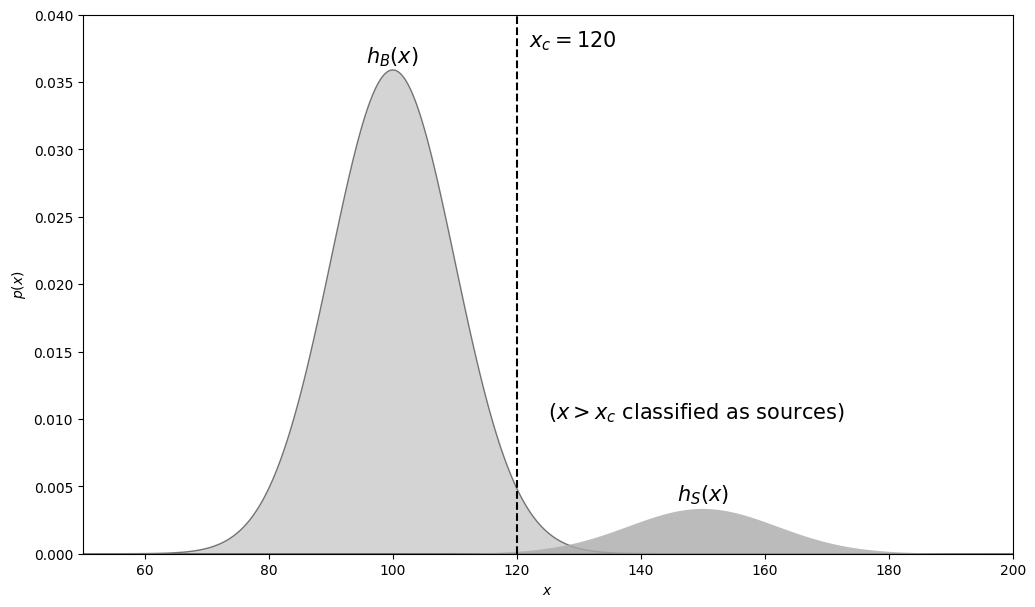

In [20]:
from scipy.stats import norm

x = np.linspace(50, 200, 1000)
p1 = 0.9 * norm(100, 10).pdf(x)
p2 = 0.1 * norm(150, 12).pdf(x)

fig, ax = plt.subplots(figsize=(12, 7))
ax.fill(x, p1, ec='k', 
        fc='#AAAAAA', alpha=0.5)
ax.fill(x, p2, '-k', 
        fc='#AAAAAA', alpha=0.8)

ax.plot([120, 120], 
        [0.0, 0.04], '--k')

ax.text(100, 0.036, r'$h_B(x)$', ha='center', 
        va='bottom', fontsize=15)
ax.text(150, 0.0035, r'$h_S(x)$', ha='center', 
        va='bottom', fontsize=15)
ax.text(122, 0.039, r'$x_c=120$', ha='left', 
        va='top', fontsize=15)
ax.text(125, 0.01, 
        r'$(x > x_c\ {\rm classified\ as\ sources})$', 
        fontsize=15)

ax.set_xlim(50, 200)
ax.set_ylim(0, 0.04)

ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.show()

### **Kolmogorov–Smirnov (KS) Test**

- we'd like to compare two different sample and understand if they were taken from the same distribution
- KS is a non-parametric test to compare a sample with a reference distribution, or two samples.
- Measures the maximum distance between the empirical CDF $\rightarrow D = max|F_1 - F_2|$
- Outputs a statistic $D$ and a p-value.
- amazingly D, does not dipend on the underlying distribution we care about
- Useful to test goodness-of-fit.

---

### **Histograms and Number of Bins**

Choosing the number of bins affects the histogram shape. The bin's width it's a hyper-parameter that has to be tune for correctly extracting the true statistics:

- **Scott’s Rule:**  
$$
\text{bin width} = \Delta_b =\frac{3.5 \times \sigma}{N^{1/3}}
$$
That's a grat rule only if we know sigma of the distribution... often it's not usable

- **Freedman-Diaconis Rule:**  
$$
\text{bin width} = \Delta_b =  \frac{2 \times IQR}{N^{1/3}} = \frac{2.7 \times \sigma_G}{N^{1/3}}
$$
where $IQR$ = interquartile range between 75% and 25% and $N$ = number of data points.

- By making histogram you are losing some information depending on the width of the bin you are choosing; It's possible to define the bin height uncertainty by a simple rule: 
$$
  \sigma_k = \frac{\sqrt{n_k}}{\Delta_b \cdot N}
$$
where: N is the total number of data, $n_k$ it's the numer of count in the k-bin and $\Delta$ is the bin width


---

### **Rug Plot**

- A simple plot showing individual data points as small vertical lines (ticks) along an axis.
- Useful to visualize the distribution of data points on top of other plots (like histograms or density plots).

---

### non parametric **Kernel Density Estimation (KDE)**

- The core idea it's not to usa a Dirac - delta in each point, but rather a distribution.
- All this distribution (kernel) are summed up to produce the PDF.
- Any distribution could be use:

#### Common kernels:

- **Gaussian kernel:**  
$$
K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}
$$

- **Epanechnikov kernel:**  
  $$
  K(x) = \frac{3}{4} (1 - x^2) \quad \text{for } |x| \leq 1, \quad 0 \text{ otherwise}
  $$
  parabolic with a fix support, more localized then the gaussian

- **Linear (triangular) kernel:**  
  $$
  K(x) = 1 - |x| \quad \text{for } |x| \leq 1, \quad 0 \text{ otherwise}
  $$  
  Linearly decreasing weights as distance from the reference point increases. **Less smooth** than Gaussian.


- **Uniform (or tophat) kernel:**  
  $$
  K(x) = \frac{1}{2} \quad \text{for } |x| \leq 1, \quad 0 \text{ otherwise}
  $$  
  Assigns equal weight to all points in a fixed window. Simple but **can produce less accurate estimates** due to lack of smoothness.


KDE bandwidth controls the smoothness (similar to bin width for histograms). That's an hyper parameter that has to be tune fine before the analysis thanks to Cross Validation. 

---

### non parametric **Nearest-Neighbor Density Estimation** (lez 17)

- Estimates density based on the volume (or hypervolume) $V_k$ containing the $k$ nearest neighbors of $x$.
- Formula:   $ \rho = \frac{k}{n \cdot V_k}$
- $\rho$ is the density value, k is the number of pointin the selected volume, $V_k$ is the spherical hypervolume calculated thans to $\frac{2d^D\pi^{D/2}}{D\Gamma(D/2)}$
- Adapts well to **local variations** in data density.

---

### **Parametric Density Estimation: Gaussian Mixture Models (GMM)** (lez 17)

GMM assumes that the data is generated from a **mixture of several Gaussian distributions**.

**Definition:**

- Probability density function:  $p(x) = \sum_{k=1}^K \pi_k \mathcal{N}(x \mid \mu_k, \Sigma_k)$  

- where $\pi_k$ are the mixing coefficients, and $\mathcal{N}$ is the multivariate normal.

- Using lots of kernels (maybe even more than the AIC or BIC score suggests) may make sense if you just want to provide an accurate description of the data (as in density estimation).  

- Using fewer kernels makes mixture models more like clustering (see earlier lecture), where the suggestion is still to use many kernels in order to divide the sample into real clusters and "background".

**Estimation:**

- Parameters $(\pi_k, \mu_k, \Sigma_k)$ are learned using the **Expectation-Maximization (EM)** algorithm.

GMMs are widely used in **clustering**, **anomaly detection**, and **density modeling**.


## <span style="color:red"> **LECTURE 8** - Bayesian Inference I </span>

- Bayes recap  
- Bayesian method  
- Prior  
- 3 Bayesian principles  
- Credibility regions  


### **Bayes Recap – Principles and Rules**

Bayes' theorem allows us to **update our belief** about a hypothesis or a parameter after observing new data. The core formula is:

$P(\theta| D) = \dfrac{P(D | \theta) \cdot P(\theta)}{P(D)}$

Where:
- $\theta$:  parameters values
- $D$: observed data
- $P(\theta)$: **prior** – initial belief before seeing the data
- $P(D | \theta)$: **likelihood** – probability of observing $D$ assuming $\theta$ is true
- $P(\theta | D)$: **posterior** – updated belief after seeing the data
- $P(D)$: normalization constant (also called **evidence**)


$$
  \text{Posterior probability} = \frac{\text{Likelihood} \times \text{Prior}}{\text{Evidence}}
$$

**IMPORTANT NOTE:** We don't often care about **the evidence $p(D)$** because it does not depend on model parameters. We usually set it to $1$ for parameter estimation. **BUT** it's at the heart of Bayesian model selection since it gives us a way of ranking different model descriptions of the data. It works like a normalization that gave us the right to compare different model.

---

### **Bayesian Method** 

1. **Define the problem** – Choose the model and the parameter $\theta$ to estimate.
2. **Assign the prior** $P(\theta)$ – Express your knowledge or assumptions about $\theta$ before the data.
3. **Define the likelihood** $P(D | \theta)$ – Describe how the data is generated from $\theta$.
4. **Compute the posterior** $P(\theta | D)$ – Using Bayes’ theorem.
5. **Estimate the parameter** – Use the posterior to get a point estimate (e.g. MAP, mean, median).
6. **Quantify uncertainty** – Through credibility intervals, variance, etc.

---

### **Prior Distributions** 

In Bayesian statistics, the prior distribution represents what we believe about a parameter before observing any data. Choosing a prior is a crucial step because it influences the final result (the posterior).

There are two main types of priors:

1. **Informative Prior**

    - A prior that incorporates specific, pre-existing knowledge or beliefs about the parameter.

    - When to use it: When you have reliable background information, from previous experiments, expert opinion, or strong theoretical expectations.

Example:
Suppose you’re estimating the probability that a coin is biased towards heads.
If previous tests suggest it lands heads ~70% of the time, you could use a Beta(7, 3) prior (centered around 0.7), which reflects your prior belief.

2. **Uninformative (or non-informative) Prior**

    - A prior that is intentionally vague or flat, expressing no strong belief about the parameter before seeing the data.

    - When to use it: When you want the data to speak for itself and avoid influencing the result with prior assumptions.

Example:
For the same coin-flip scenario, if you have no idea about the bias, you might use a uniform prior over [0, 1], this assumes all probabilities are equally likely.



When no strong prior information is available, there are three main principles to guide the choice:

- **Principle of indifference**: Assign equal probabilities when there is no reason to prefer one value over another. 
- **Invariance principle**: The prior should remain consistent under reparameterization.
- **Maximum entropy**: Among all distributions compatible with known constraints, choose the one with the highest entropy (least informative).

If you choose the wrong prior, it's your fault (GIGO), only an anormus amount of data could correct your initial belif, in this case you can say that are **"data dominated"**, otherwise you are **"prior dominated"**.


---

### **Bayesian Credible Regions**

In the **frequentist paradigm**, the meaning of the confidence interval $\mu_0 \pm \sigma_{\mu}$ is 
the interval that would contain the true $\mu$ (from which the data were drawn) in $68\%$ (or X\%) cases
of a large number of imaginary repeated experiments (each with a different N values of $\{x_i\}$). 

However, the meaning of the so-called **Bayesian credible region** is fundamentally different: it is the interval that **I believe** contains the true $\mu$  with a probability of $68%$ (or $X\%$) after I've collected my data (my dear, one and only dataset; no imaginary repetitions). This credible region is the 
relevant quantity in the context of scientific measurements. 

There are several important features of a Bayesian posterior distribution:
- They represent how well we believe a parameter is constrained within a certain range
- We often quote the posterior maximum (**Maximum A Posteriori (MAP)**).
- We also often quote the posterior expectation value (i.e. mean) $\bar{\theta} = \int \theta\, p(\theta|D)d\theta$, or most often median (recall: robust estimator).
- **The credible regions are not unique**. We can compute them in two different ways
    1. We can integrate downwards from the MAP to enclose $X\%$ ("highest probability density interval"), or
    2. We can integrate inwards from each tail by $X/2\%$ ("equal-tailed interval")

<p align="center">
  <img src="immagini/bayes_credible_region.png" alt="boh" width="600"/>
</p>

## <span style="color:red"> **LECTURE 9** - Bayesian Inference II </span>

- Odds ratios  
- Bayes factors  
- Frequentist vs Bayesian  

The following to produces the log-posterior pdf of parameters $\mu$ and $\sigma$ of an underlying Gaussian distribution. The dataset has $N=10$ values, drawn from $\mu=1$, $\sigma=1$, each measured with an uncertainty drawn from a uniform distribution $0<e_i<3$.

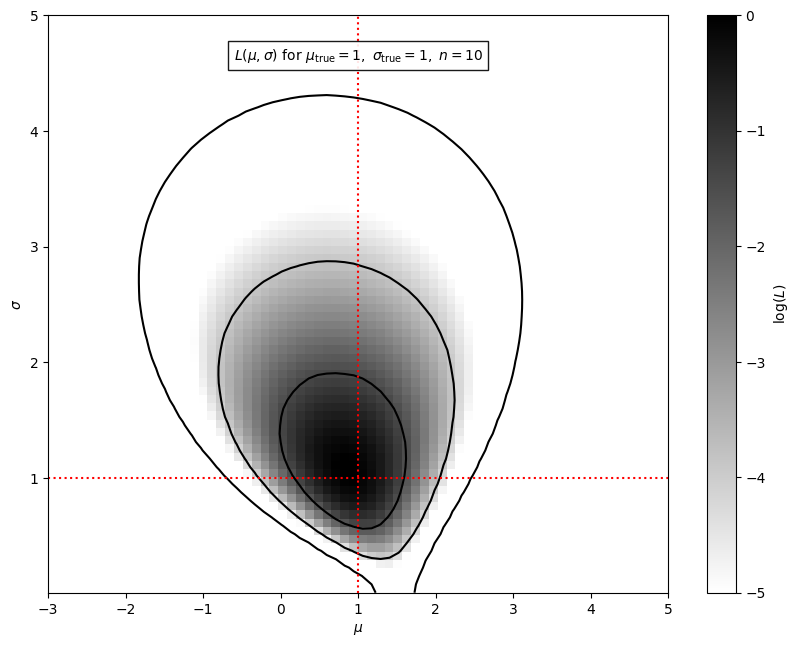

In [21]:
from astroML.plotting.mcmc import convert_to_stdev  # Converts log-likelihood to contour levels (1σ, 2σ, 3σ)

np.random.seed()  # Set random seed for reproducibility

#------------------------------------------------------------
# Define the log-likelihood function for the gauss-gauss model
def gaussgauss_logL(xi, ei, mu, sigma):
    """
    Log-likelihood for a model where:
    - xi are observed data points
    - ei are uncertainties in the data
    - mu, sigma are the model parameters (mean and std of underlying distribution)
    
    Assumes xi ~ Normal(mu, sqrt(sigma^2 + ei^2))
    """
    # Prepare shapes for broadcasting: make mu and sigma broadcastable with xi and ei
    ndim = len(np.broadcast(sigma, mu).shape)

    # Reshape xi and ei to broadcast properly over mu and sigma grids
    xi = xi.reshape(xi.shape + tuple(ndim * [1]))
    ei = ei.reshape(ei.shape + tuple(ndim * [1]))

    # Total variance = model variance + measurement variance
    s2_e2 = sigma ** 2 + ei ** 2 # eteroschedastic

    # Return the total log-likelihood (log product = sum of logs)
    return -0.5 * np.sum(np.log(s2_e2) + (xi - mu) ** 2 / s2_e2, 0)

#------------------------------------------------------------
# Simulate a dataset
mu_true = 1.0       # True mean
sigma_true = 1.0    # True standard deviation
N = 10              # Number of data points

# Measurement uncertainties ei ~ Uniform(0, 3)
ei = 3 * np.random.random(N)

# Generate observed data xi from N(mu_true, sqrt(sigma_true^2 + ei^2))
xi = np.random.normal(mu_true, np.sqrt(sigma_true ** 2 + ei ** 2))

#------------------------------------------------------------
# Create a grid of mu and sigma values to evaluate log-likelihood
sigma = np.linspace(0.01, 5, 70)           # 70 values of sigma from 0.01 to 5
mu = np.linspace(-3, 5, 70)                # 70 values of mu from -3 to 5

# Evaluate log-likelihood on the mu-sigma grid
logL = gaussgauss_logL(xi, ei, mu, sigma[:, np.newaxis])

# Normalize log-likelihood: subtract max for numerical stability
logL -= logL.max()

#------------------------------------------------------------
# Plot the log-likelihood heatmap and contours
fig = plt.figure(figsize=(10, 7.5))

# Show log-likelihood as image
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')

# Add colorbar
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)  # Clamp color scale for better contrast

# Add a text box explaining the setup
plt.text(0.5, 0.93,
         (r'$L(\mu,\sigma)\ \mathrm{for}\ \mu_{\rm true}=1,\ '
          r'\sigma_{\rm true}=1,\ n=10$'),
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

# Plot confidence contours (1σ, 2σ, 3σ)
plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),  # Corresponds to 1σ, 2σ, 3σ
            colors='k')

# Draw dotted lines at true values of mu and sigma
plt.axhline(mu_true, c='red', ls='dotted')
plt.axvline(sigma_true, c='red', ls='dotted')

# Labels
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

# Show the plot
plt.show()


**Key takeaways**
- By eye,  $\mu=1$, $\sigma=1$ are not too far from the MAP parameter values. This is ok, but...
- The posterior pdf is not symmetric around $\mu=1$.
- In fact it is consistent within the $99.7\%$ credible region of having $\sigma=0$!. 
- The marginal distributions of each parameter would not look Gaussian either.

---

### Bayesian Model Comparison vs. Frequentist Hypothesis Testing

In classical (frequentist) statistics, we test hypotheses using tools like **p-values**, which tell us how extreme the data would be *if the null hypothesis were true*. But:

- **In Bayesian inference, we don't use p-values.**  
- Instead, we **compare models probabilistically** based on how well they explain the observed data, considering our prior beliefs.

---

### Posterior Probability of a Model

Given:
- Data $D$
- Model $M$
- Initial knowledge $I$

The **posterior probability** of the model is: $ p(M \mid D, I) = \frac{p(D \mid M, I) \cdot p(M \mid I)}{p(D \mid I)} $

Where:
- $p(D \mid M, I)$ = **evidence** (or marginal likelihood)

    KEEP ATTENTION, BEFORE WE CALLED "EVIDENCE" THE DENOMINATOR ($p(D \mid I)$)
- $p(M \mid I)$ = prior belief in model $M$
- $p(D \mid I)$ = normalization constant (sums over all models)

---

### Odds Ratio $ \mathcal{O}_{21} $

The **odds ratio** compares the posterior probabilities of two competing models $M_1$ and $M_2$:

$ \mathcal{O}_{21} = \frac{p(M_2 \mid D, I)}{p(M_1 \mid D, I)} = \frac{p(D \mid M_2, I)\,p(M_2 \mid I)}{p(D \mid M_1, I)\,p(M_1 \mid I)} $

This can be rewritten as: $ \quad \mathcal{O}_{21} = B_{21} \cdot \frac{p(M_2 \mid I)}{p(M_1 \mid I)} $

Where:
- $B_{21}$ is the **Bayes Factor**
- $p(M_2) \backslash p(M_1)$ is the **prior odds** on the models

So the **odds ratio** combines:
- How well each model explains the data (via **Bayes Factor**)
- How much we believed in each model *a priori* (via **prior odds**)


###  Interpretation of Odds Ratio

If $\mathcal{O}_{21} = 10$, then:
> *Model $M_2$ is ten times more probable than Model $M_1$, given the data and our prior knowledge.*

This means that a **10-to-1 bet** in favor of $M_2$ over $M_1$ would be a **fair bet** based on current knowledge.

---

### Bayes Factor $ \mathcal{B} $

The **Bayes Factor** compares how well two models predict the data:

$ B_{12} = \frac{p(D \mid M_1, I)}{p(D \mid M_2, I)} = \frac{\mathcal{Z}_1}{\mathcal{Z}_2} $

Where $ \mathcal{Z}_i = p(D \mid M_i) $ is the **evidence** for model $M_i$: $ \quad \mathcal{Z}_i = \int p(D \mid \theta_i, M_i)\, p(\theta_i \mid M_i)\, d\theta_i $

This is a **weighted average of the likelihood** over all possible values of the model parameters, weighted by the prior.

### Important distinction:
- The **likelihood** $p(D \mid \theta, M)$ is a function of parameters.
- The **evidence** $p(D \mid M)$ is a **single number** that tells you how well the entire model explains the data.

---

### Jeffreys’ Scale for Interpreting Bayes Factors

| $B_{10}$ Value        | Evidence in favor of Model $M_1$         |
|------------------------|------------------------------------------|
| $<1$                   | Supports Model $M_2$                      |
| $1$ to $3$             | Weak                                     |
| $3$ to $10$            | Moderate                                 |
| $10$ to $100$          | Strong                                   |
| $>100$                 | Decisive                                 |

Higher $B_{10}$ → stronger evidence for Model $M_1$

---

### **Frequentist vs Bayesian Approach**

|              | **Frequentist**                                                 | **Bayesian**                                                        |
|----------------------|------------------------------------------------------------------|----------------------------------------------------------------------|
| **Parameters**        | Treated as **fixed but unknown** values                         | Treated as **random variables** with probability distributions       |
| **Probability**       | Interpreted as **long-run frequency** of events                 | Interpreted as **degree of belief** or subjective certainty          |
| **Data**              | Considered as **repeatable random samples** from a population   | Considered as **fixed once observed**; inference is updated via Bayes’ rule |
| **Use of Prior**      | **Not used**; all inference is based on data                    | **Essential**; priors express beliefs before seeing the data         |
| **Inference**         | Based on **sampling distribution** and repeated hypothetical experiments | Based on **posterior distribution**, combining prior and data        |
| **Model Comparison**  | Uses **p-values, confidence intervals, likelihood ratios**      | Uses **Bayes factors, posterior probabilities, credible intervals**  |
| **Interpretation**    | Results apply to **what would happen in repeated experiments**  | Results apply to **the current data and model assumptions**          |



## <span style="color:red"> **LECTURE 10** - Bayesian Inference III </span>

- Monte Carlo  
- Markov chains (detailed balance)  
- MCMC (Markov Chain Monte Carlo)  
- Metropolis–Hastings algorithm  
- Corner plot  
- Trace plot  
- Burn-in  
- Steps

###  **Monte Carlo Methods**

- **Monte Carlo methods** are computational algorithms that rely on repeated **random sampling** to estimate numerical results.
- Widely used in physics, statistics, and Bayesian inference.
- Particularly helpful when analytical solutions are difficult or impossible.
- However, in high-dimensional spaces, standard Monte Carlo can become highly **inefficient**, which motivates the use of improved techniques like MCMC.

---

###  **Markov Chains**

A **Markov chain** is a sequence of random variables (states) where the probability of moving to the next state depends **only on the current state**, not on the path taken to get there. This is called the **Markov property**, or **memorylessness**.

Mathematically, if you're in state $x$ now, the probability of moving to state $x'$ is:
$
P(x | x')
$

#### **Stationary Distribution**

A **stationary distribution** $\pi(x)$ is a probability distribution over the states that **remains unchanged** as the Markov chain evolves.

It satisfies the condition:
$$
\sum_{x} \pi(x) \cdot P(x \to x') = \pi(x') \quad \text{for every } x'
$$

This means that the probability of being in state $x'$ at the next step is equal to the sum of the probabilities of arriving at $x'$ from all other states, taking into account:
- How likely it was to be in each of those states ($\pi(x)$)
 
- And the probability of transitioning from $x$ to $x'$ ($P(x \to x')$).


#### **Detailed Balance Condition**

A **sufficient condition** for a Markov chain to have a stationary distribution $\pi(x)$ is the **detailed balance condition**:

$$
\pi(x) \cdot P(x \to x') = \pi(x') \cdot P(x' \to x)
$$

This condition says that the **flow of probability** from state $x$ to $x'$ is the same as from $x'$ to $x$.  
It implies **reversibility** of the chain and ensures that $\pi(x)$ is a stationary distribution.


---

### **Markov Chain Monte Carlo (MCMC)**

- **MCMC** combines the idea of Monte Carlo sampling with Markov chains to draw samples from complex distributions.
- The key idea is to construct a Markov chain whose stationary distribution is the **target distribution** $\pi(x)$ (typically the posterior in Bayesian inference).
- Even if $\pi(x)$ is only known **up to a normalization constant**, MCMC methods can still be used to sample from it.


####  Why Use MCMC?

In Bayesian inference, we are often interested in the **posterior distribution**, but computing it explicitly is hard.  
MCMC allows us to **approximate** this distribution by generating samples from it, rather than calculating it directly.

This makes MCMC a powerful and flexible tool for inference in complex models.

---

### **Metropolis-Hastings Algorithm**

- A widely used MCMC algorithm.
- Generates a sequence of samples that approximates $\pi(x)$, the posterior distribution.

#### Steps:
0. Define a prior based on your knowlwdge, such as a normal distribution centered at 0 with a define spread
1. Start from an initial point $\mu = -1$ (just an example). Draw another distribution **T($\mu | \mu'$)** centered at the propose value: Usually a normal distribution centered at the current $\mu$, with spread $\tau$.
2. Propose a new point $\mu'$ from the **proposal distribution T($\mu | \mu'$)** .
3. calculate the prior value, i.e. the value of the prior at the 2 $\mu$ we are evaluating, this expressed how much I belived in this value.
4. calculate the likelihood between the original dataset and the distributions centered at the two value we are considering
5. Compute the **acceptance probability** = $\alpha$,  define as fraction between the 2 product of the likelihood x prior x T:
    $$
    \alpha = \min\left(1,\ 
    \frac{L(\text{data} \mid \mu') \cdot P_{\text{prior}}(\mu') \cdot T(\mu \mid \mu')}
        {L(\text{data} \mid \mu) \cdot P_{\text{prior}}(\mu) \cdot T(\mu' \mid \mu)}\right)
    $$ 

    If the proposal distribution is **symmetric**, i.e. $T(\mu | \mu') = T(\mu' | \mu)$, the acceptance ratio simplifies to:

    $$
    \alpha = \min\left(1,\ 
    \frac{L(\text{data} \mid \mu') \cdot P_{\text{prior}}(\mu')}
        {L(\text{data} \mid \mu) \cdot P_{\text{prior}}(\mu) }\right)
    $$ 
6. Draw a uniform random number between 0 and 1 ... Accept $\mu'$ with probability $\alpha$, otherwise stay at $\mu$.
7. Repeat the process to create a Markov chain.

NOTE: likelihood x prior = posterior (idgaf about the evidence...) 

KEEP ATTENTION: MA gives you a sample dataset from the posterior PDF, but not the PDF itself! you have to run some density estimation methode (KDE) for achive the correct $\pi(x)$

---

### **Burn-in and Plot**

- The early steps of MCMC may not represent the target distribution well.
- The **burn-in period** refers to the initial segment of the chain that is discarded.
- A **trace plot** shows the sampled values over steps — used to check convergence.
- A **corner plot** (also called pair plot) is used to visualize multidimensional posterior distributions, it Shows histograms of each parameter.
- See the correspondent exercise for more comment on the joint distribution
---

### **Autocorrelation and Thinning in MCMC**

In a Markov Chain Monte Carlo (MCMC) simulation, successive samples are typically **autocorrelated**, meaning each sample is statistically dependent on previous ones. This **reduces the efficiency** of the sampling process, because many steps are needed to obtain samples that are effectively independent.

This dependence is quantified by the **correlation length** (also called the **autocorrelation time**) $\lambda$, which measures how many steps it takes for the chain to "forget" it's current state. As a result, the **effective number of independent samples** is smaller than the total number of steps:

$$
\text{Effective samples} \approx \frac{N_\text{total}}{\lambda}
$$

One historical method to address autocorrelation is **thinning**: keeping only every *k*-th sample (e.g., every 5th), discarding the rest. While this may reduce autocorrelation between stored samples, it also **throws away potentially useful information**. 

---

### **Step Size Tuning**

The **step size** (aka the spread of the T distribution, I call it $\tau$ above) controls how far the chain jumps between states. Choosing it well is crucial:

- If the step is **too small**: the chain moves slowly, samples are highly correlated → inefficient exploration.
- If the step is **too large**: the chain proposes states far from the current one, and many of them get **rejected** → again, inefficient.

the **Goal** is balance **acceptance rate** and **decorrelation**.

Typical strategy:
- Tune the step size to achieve a **moderate acceptance rate** (e.g. ~20–40% for Metropolis-Hastings).
- Monitor the **autocorrelation** or use **diagnostic plots** (e.g. trace plot) to check if the chain is mixing well.

There is no universal best step size: it depends on the shape of the target distribution and the algorithm used.



## <span style="color:red"> **LECTURE 11** - Bayesian Inference IV </span>

- Adaptive Metropolis  
- Single Component Adaptive Metropolis  
- Hamiltonian Monte Carlo  
- Emcee  
- Gibbs sampling  
- Conjugate Prior

### **Adaptive Metropolis**

**Definition**: An MCMC method that adapts the proposal distribution $T$ based on the history of the chain.

- In the **Metropolis-Hastings** algorithm, choosing a good proposal distribution is crucial.
- Adaptive Metropolis (AM) automatically tunes the **covariance matrix** of the proposal distribution as the chain progresses.
- This allows better exploration of the posterior, especially in high-dimensional or correlated parameter spaces.
- This method doesn't use only the last point, but it use the entire chain, **our chain is no longer markovian**.
- To fix this, we often let the algorithm "learn" during an initial phase (called the tuning stage), where it adapts the proposal. After that, we stop adapting and keep the proposal fixed — from that moment on, the chain becomes Markovian again and gives valid Bayesian results.
---

### **Single Component Adaptive Metropolis (SCAM)**

**Definition**: A variant of Adaptive Metropolis where only one parameter (component) is updated at a time.

- Standard MCMC or AM methods like Metropolis-Hastings suffer of low rate in high-dimensional spaces.
- SCAM is especially useful when parameters have **different scales or conditional dependencies**.
- At each iteration, only one dimension of the parameter vector is updated, often using an adaptive univariate proposal.
- This can be more efficient than updating all parameters jointly, especially in the presence of strong correlations.
- The adaptation improves sampling efficiency over time.

---

### **Other method**

**Hamilton Monte Carlo**: An MCMC algorithm that uses concepts from physics (Hamiltonian dynamics) to make informed proposals in parameter space, improving efficiency in exploring complex posterior distributions.


**Differential Evolution** : A population-based optimization algorithm that can be adapted for MCMC by evolving a set of candidate solutions using differences between randomly selected members of the population to guide proposals.

---

### **`emcee`**

- It's a full python package.
- Emcee is designed to efficiently sample from **complex, anisotropic posterior distributions**.
- It uses multiple parallel "**walkers**" that share information and adapt proposals to the geometry of the target distribution.
- The process need a starting guess, we don't need to be too precise, the chain will eventualy converge to the true value
- Need also the **number of step** for the chain, and the **burn-in region** too
- has some specific method to discard the **auto correlation lenght**

---

### **Gibbs Sampling**

**Gibbs sampling** is a type of MCMC algorithm that avoids the need for rejection — **every proposed sample is accepted**. It's especially efficient when the conditional distributions of the parameters are known and easy to sample from.


#### **How It Works**

1. **Initialize** the sampler at some starting point in parameter space.
2. **Iterate over each parameter** in turn.
3. For each parameter:
   - Keep all other parameters fixed.
   - Sample a new value from the **conditional posterior distribution** (THAT YOU HAVE TO KNOW) of that parameter.
  
   In **Gibbs sampling**, you want to sample from a multivariate posterior distribution, like: $ p(\theta_1, \theta_2 \mid \text{data}) $

   But instead of sampling from the joint distribution directly (which is often hard), Gibbs sampling works by cycling through the **conditional distributions**:

   1. Fix $\theta_2$, and sample $\theta_1$ from the conditional distribution:

      $$
      p(\theta_1 \mid \theta_2, \text{data})
      $$

   2. Fix the new $\theta_1$, and sample $\theta_2$ from:

      $$
      p(\theta_2 \mid \theta_1, \text{data})
      $$

   You **must know** and be able to **sample from** these conditional distributions. If not, Gibbs sampling **cannot** be used, and you need to switch to a more general method like **Metropolis-Hastings**.

4. Repeat this process for **many iterations (Gibbs steps)** to build your Markov chain.


####  **Key Features**

-  Every sample is **automatically accepted** (no rejection step).
-  Very **fast and efficient**, especially in high-dimensional spaces.
-  **Short burn-in period** — reaches equilibrium quickly.
-  **Limitation**: Requires knowledge of the **conditional distributions** of all parameters.


Use it when:
- You know how to compute and sample from the **conditional posterior distributions**.
- You need a **simple, efficient MCMC** method.

---

### **Conjugate Prior**

**Definition**:  
In Bayesian statistics, a **conjugate prior** is a prior distribution that, when combined with a particular **likelihood function**, results in a **posterior distribution** that is in the same family as the prior.

- It simplifies calculations.
- The posterior has a known and tractable form.
- Useful for analytical solutions and understanding posterior updates.




## <span style="color:red"> **LECTURE 12** - Bayesian Inference V </span>

- Savage – Dickey ratio  
- Nested Sampling with Dynesty

### **Savage – Dickey Density Ratio**

It's a shortcut to compare two models Odd's factor when one is a **special case** of the other.

Let’s say:

- $M_1$: the **simple model**, where a parameter $A = 0$ (e.g., "no signal", A stay for Amplitude)
- $M_2$: the **full model**, where $A$ can be anything (e.g., "signal allowed")

Then, instead of computing evidence for both models, we use this trick:

$$
\mathcal{B} = \frac{p(A = 0)}{p(A = 0 \mid \text{data})}
$$

This is the **Bayes factor** between $M_2$ and $M_1$.

#### What Does It Mean?

- $p(A = 0)$ is how much we believed in $A = 0$ **before seeing the data**.
- $p(A = 0 \mid \text{data})$ is how much we believe in $A = 0$ **after seeing the data**.

If the data makes $A = 0$ **less likely**, then $M_1$ is disfavored.


#### How Do We Use It?

1. Run MCMC on the full model $ M_2 $.
2. From the samples, estimate $ p(A = 0 \mid \text{data}) $.
   - For example, use a histogram or KDE on the samples of $ A $.
3. Calculate $\mathcal{B}$ using the ratio.


#### Why is this useful?

- You don’t need to compute full evidences $\mathcal{Z}_1$ and $\mathcal{Z}_2$.
- Fast and simple, especially when comparing null hypotheses.



| Concept                 | recup                                                                                                                                                                                                                                                                                                                                                                                       |
| ----------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Bayes Factor**        | A **general method** to compare two models ($M_1$ and $M_2$) by taking the ratio of their **evidences**:   $ mathcal{B}_{21} = \frac{P(\text{data} \mid M_2)}{P(\text{data} \mid M_1)} $ It tells you how much more the data supports one model over the other. Requires full integration over parameter space.                                                                               |
| **Savage–Dickey Ratio** | A **special case** of the Bayes factor, used **only** when: $M_1$ is a **special case** of $M_2$ (e.g. $A=0$) You can compute the **prior** and **posterior density** at a single point (e.g. $A=0$). Then:  $\mathcal{B}_{21} = \frac{p(A=0)}{p(A=0 \mid \text{data})}$ It's a shortcut that **gives the Bayes factor** without needing to compute full evidences. |


---

### **Nested Sampling**

Nested Sampling is a method to **compute the evidence** $\mathcal{Z}$ in Bayesian inference:

$$
\mathcal{Z} = \int \mathcal{L}(\theta) \, \pi(\theta) \, d\theta
$$

- $\mathcal{L}(\theta)$ = the likelihood function, i.e., how likely the observed data is given a specific value of $\theta$.
- $\pi(\theta)$ = the prior probability density of $\theta$, expressing our belief about $\theta$ before seeing the data.
- $\mathcal{Z}$ = the evidence or marginal likelihood, which is the normalization constant for Bayes' theorem.


This is crucial for **comparing models**, since:

$$
\text{Bayes Factor} = \frac{\mathcal{Z}_2}{\mathcal{Z}_1}
$$

But computing $\mathcal{Z}$ is hard — especially in high dimensions. That’s where Nested Sampling comes in.


#### How It Works

1. Start with $N$ random points from the **prior**.
2. Find the one with the **lowest likelihood**, call it $L_{\text{min}}$.
3. Remove it, and **replace** it with a new point sampled from the prior **subject to** $\mathcal{L} > L_{\text{min}}$.
4. Keep track of the shrinking prior volume and the associated likelihoods.
5. Approximate the 1D integral $\mathcal{Z}$ using the sequence of $(X_i, \mathcal{L}_i)$ points.

In Python, the `dynesty` library does this automatically:

---

### **Very important** 
- The samples produced by a **nested sampling** run are **weighted**—each sample contributes differently to the final result based on its weight, which reflects its posterior probability mass.
  
  Therefore, you must **always use the samples together with their weights** when computing expectations, visualizing posteriors, or performing any statistical analysis.  

- If an MCMC is taking to long, you can interrupt it and use samples you got so far (assuming you're past the burn in period). This is not possible with nested sampling; samples don't make any sense until the algorithm reached the top of the posterior! You have to let it go till the end.

- See the correspondent exercise for more comment about the possible plot on dynesty

## <span style="color:red"> **LECTURE 13** - Data Mining & Machine Learning </span>

- What is machine learning 
- Features, samples, classes and instances
- Scikit-learn
- Supervised learning (classification and regression)
- Unsupervised learning (clustering, dimensionality reduction) 
- Model validation:
  - Confusion matrix
  - Training set / Test set
- **Note**: This lecture provided a brief overview of many concepts, which will be explored in more depth later on.


### **What is Machine Learning and Its Main Purpose**

Machine Learning (ML) is a branch of artificial intelligence where computers learn patterns from data to make decisions or predictions without being explicitly programmed. The main goal is to build models that generalize well on new, unseen data.

---

### **Key Terms**

- **Features:** The input variables or attributes used to describe each data point (e.g., height, weight).  
- **Sample / Instance:** A single data point or observation with its features (e.g., one person's measurements).  
- **Classes:** Categories or labels that data points belong to in classification tasks (e.g., cat, dog).  
- **Target:** The output or label we want to predict.

---

### **`Scikit-learn`** 

Scikit-learn is a popular Python library for machine learning. It provides easy-to-use tools for data preprocessing, modeling, and evaluation.

- **Data format:**  
  - Input features: a 2D array/matrix of shape $(n\_samples, n\_features)$.  Always in this form, **it's very picky**.
  - if your x is just 1D, you have to reshape it in ND by using `np.newaxis()`
  - Target labels: A 1D array of length $n\_samples$.


#### **Common Scikit-learn Methods**

An **estimator** in scikit-learn is any object implementing at least the methods `.fit()` and `.predict()` or `.transform()`. 
Usually call model.

- **`model.fit(X, y)`:** Trains the model on data $X$ with labels $y$.  
- **`model.predict(x)`:** Predicts labels for new data $x$.  
- **`model.predict_proba(X)`:** Gives the probability estimates for classification classes (if available).  
- **`model.score(X, y)`:** Returns the accuracy on data $X$ compared to true labels $y$.  
- **`model.transform(X)`:** Applies a transformation to data $X$ (used in dimensionality reduction, feature extraction).

---


### **Supervised Learning**

In supervised learning, the model learns from labeled data:

- **Classification:** Predicting discrete labels. We will use the propriety of a dataset to predict unlabeled data.
- **Regression:** Predicting continuous values.

---

### **Unsupervised Learning**

Unsupervised learning deals with unlabeled data:

- **Clustering:** Grouping similar data points .  
- **Dimensionality Reduction:** Reducing data features while preserving structure , usefull in data visualization.
- **Density Estimation** can determine the distribution of the data within the parameter space.

The main difference is that no label is provided; the goal is to find hidden patterns or structure.

---


### **Model Validation**
Determine how well your model will generalize from the training dataset to future unlabeled data.

- **Confusion Matrix:** A matrix showing true vs. predicted classes to evaluate classification accuracy and errors.  The element on the diagnal are the one correctly identified, the off-diagonal are confunded.
- **Training Set:** Data used to train the model.  
- **Test Set:** Separate data used to evaluate model performance on unseen (but labeled) data.



## <span style="color:red"> **LECTURE 14** - Clustering </span>

- whats are hyperparameter and make example
- cross validation hyper parameter tuning
- training  / validation / test 
- K - fold cross validation
- mix con mcmc se massimo si trova tra due punti
- clustering, non sappiamo come faccia , ma funziona
- mean shift clustering


### **Hyperparameters**

Hyperparameters are parameters that are **not learned from the data**, but set **before** the learning process begins. They control the learning process and model structure.
They can easily fool us into thinking something wrong about the data.

### Examples:
- Number of clusters in K-means ($K$)
- number of bins in a histogramm
- Depth of a decision tree
- Bandwidth in Kernel Density Estimation (KDE)

These are typically chosen via **validation** methods like **cross-validation** (see below).

---


### **Training / Validation / Test Sets**

We can think of divide the dataset into:

1. **Training set**: Used to **fit** the model.
2. **Validation set**: Used to **tune hyperparameters** and select the best model version.
3. **Test set**: Used only **at the end** to report the final unbiased performance of the selected model.

But we know that less data is bad for ML, and also make the result dipendent on what is inside each set (think at outliars, if they fall into test gave a different risult...)
We can solve this problem thanks to Cross Validation (CV)

---

### **K-Fold Cross Validation**

Cross-validation is a technique to **evaluate the generalization ability** of a model by partitioning the data into multiple subsets.

### Why it matters:
- Helps prevent **overfitting** and **underfitting**
- Makes full use of data (especially important with small datasets)
- Gives a better estimate of model performance

K-Fold is a smarter form of cross-validation:

1. Split the Training data into $K$ equal parts (folds).
2. For each fold:
   - Use $K-1$ folds for training
   - Use the remaining fold for validation
3. Repeat $K$ times so every point gets to be in the validation set once.
4. Extract the best parameter from the $K$ validation results.
5. Use the Test data to evaluate the model.

We can take it to extreme by taking K = N = number of data, this is called "**Leave one  out**" Cross Validation, This drammatically increase the computational cost, but reduce gratly the variance.

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

**IMPORTANTE NOTE:** (in my opinion) 
Before any type of analysis to the data (but it's more important if I divide the dataset in different sub-folder) it' crucial shuffle corrrectly the dataset, that's because you usally have some outliars all nearby thanks to a bad measurment that day, by shuffle them you don't take the risk to have all the outliars in a single folder.

---


## **Clustering**

Clustering is **unsupervised learning**: grouping similar data points without knowing the labels.  
It aims to discover structure in data by finding clusters (dense regions) of similar observations.


### **K-Means Clustering**

**K-Means** is a simple and popular **centroid-based** clustering algorithm.

#### How it works:
1. Choose the number of clusters $k$ (a hyperparameter).
2. Initialize $k$ **centroids** (usually randomly).
3. Assign each data point to the **nearest centroid**.
4. Update centroids as the **mean of points assigned** to each cluster.
5. Repeat steps 3–4 until convergence (no significant change in centroids or assignments).

**Objective:** Minimize the **within-cluster sum of squares** (WCSS):

$$
\text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

where $C_i$ is the set of points in cluster $i$ and $\mu_i$ is the centroid of $C_i$. $K$ is the number of cluster. 

You are minimizing the distance between points and centroid for each cluster

#### Strengths:
- Efficient and scalable
- Easy to implement

#### Weaknesses:
- Requires choosing $k$
- Assumes spherical, equally sized clusters
- Sensitive to initialization
- Sensitive to outliers



### **Mean Shift Clustering**

**Mean Shift** is a **non-parametric**, **density-based**, **centroid-shifting** clustering algorithm.

#### How it works (Density Gradient Ascent):
1. Define a **window (kernel)** around each data point — typically a Gaussian with bandwidth $h$.
2. Compute the **mean of data points** within the window.
3. Move (shift) the window center toward the **mean**.
4. Repeat steps 2–3 until convergence (i.e., the center stops moving).
5. Merge points converging to the same center into a **single cluster**.


It performs **gradient ascent** on a kernel density estimate (KDE). The mode (maximum) of the KDE becomes the cluster center.


#### Strengths:
- **Does not require predefining the number of clusters**
- Can identify clusters of **arbitrary shape**
- **Robust** to outliers
- Works well when clusters correspond to **modes in the density**

#### Weaknesses:
- Computationally expensive (especially on large datasets)
- **Bandwidth selection** is critical — too large merges clusters, too small splits them
- Does not scale well in high dimensions




## <span style="color:red"> **LECTURE 15** - Dimensional Reduction I </span>

- Curse of Dimensionality
- PCA (apply a trasform to the data such that the new axes are aligned with the maximal variance of the data, ortogonalization in more dimension, fewer then the original dimension: some are discard, at the end of the game it's a diagonalization)
- data preparization for PCA: subtract the mean, divide by the variance , normalize eachsample
- in spectral imaging from galaxxy, every peak grow on a background , that's not noise, it's physisc, but i can remove it thanks to PCA
- scree plot, first 2 comoponent exlain 96% of the variance in our example
- interpreting PCA result
- PCA it's linear, it struggle a lot with non linear component
- Recostruction of dark area with PCA
- overview of non-negative  matrix factorization
- overvie (just know it exist) of ICA 

### **Curse of Dimensionality**

As the number of features (dimensions) increases:
- The volume of space increases exponentially.
- Data becomes **sparse**, even if you have a lot of it.
- Models struggle to generalize well.
- Distance metrics (like Euclidean distance) lose meaning — all points start to look equally distant.

Example: If each feature has a 50% chance of matching, the probability that all $n$ match is $0.5^n$. Even with just 4 features, that’s only 6.25%!

---
### **PCA (Principal Component Analysis)**

PCA is a technique to **reduce dimensionality** by projecting data to a new space:
- New axes are the directions of **maximum variance** of the original dataset.
- These axes (principal components) are **orthogonal**.
- Redundant dimensions are **discarded**.
- The process is equivalent to **diagonalizing the covariance matrix**.

**PCA is a dimensional reduction process because we can generally account for *nearly all* of the variance in the data set with fewer than the original $K$ dimensions.** See 

#### Steps:
1. **Center the data**: Subtract the mean.
2. **Scale the data**: Divide by the standard deviation.
3. Normalize samples (optional, done for spectral images).
4. Compute the **covariance matrix**.
5. Compute **eigenvectors/eigenvalues**.
6. Sort eigenvectors by decreasing eigenvalue → these are the principal components. (eingvalues reflect the variance)

One you have the eigenvectors $e_j(k)$, you can recostruct a true data $x_i(k)$ in the eigenvecture basis as: 

$$
    x_i(k) = \mu(k) + \sum_j \theta_{ij}e_j(k)
$$


<p align="center">
  <img src="immagini/Screenshot 2025-06-27 154332.png" alt="boh" width="600"/>
</p>

#### PCA Limitations

- **Linear**: PCA can’t handle **non-linear structures** in data.
- Struggles with **curved manifolds** (e.g., spirals).
- We would need all the component for the 100% exlaination
- how many component should i keep? Cross validation is the answer ...

let's look at the video for a better comprensation of how it work

---

### **Scree Plot & Explained Variance**

A **scree plot** shows eigenvalues (variance explained) by each principal component.

In our exaple the first 2 components explain 96% of the variance:
- So you can reduce your data to 2D while keeping most information.
- Useful for **visualization** and **noise reduction**.

---

### **Dark Area Reconstruction with PCA**

You can use PCA to reconstruct **missing or corrupted data** (e.g., missing regions in astronomical images):
- Fit PCA on complete data.
- Project corrupted sample into the PC space.
- Reconstruct using the leading PCs → fill in missing values based on structure learned from the rest.

---

### **Overview: Non-Negative Matrix Factorization (NMF)**

**NMF** is a technique that factorizes a matrix $X$ into the product of two matrices:

$$
X \approx WH
$$

with the important constraint that **all elements of** $W$ and $H$ are **non-negative** (i.e., no negative numbers allowed).

This makes the results easier to interpret in many real-world cases, especially when the data naturally can't be negative (like pixel intensities or word counts).

**Applications:**
- Discovering topics in a collection of documents
- Breaking down images into basic components
- Analyzing spectral data in astronomy or chemistry

Compared to **PCA**, which can use negative values, **NMF tends to produce more interpretable results**, often representing **distinct parts** of the input (like separate topics or objects).

---

#### **Just Know It Exists: ICA (Independent Component Analysis)**

**ICA** is another method for decomposing data, but instead of focusing on variance (like PCA), it looks for **independent** components.

That means it tries to separate a complex signal into **underlying sources** that are as statistically **independent** from each other as possible.

**Typical use cases:**
- **Blind source separation** (e.g., separating different voices recorded by multiple microphones)
- Analyzing EEG brain signals
- Uncovering independent trends in financial time series


---


## <span style="color:red"> **LECTURE 16** - Dimensional Reduction II </span>

- manifold learning techniques
- Locally Linear Embedding (what is it, scheme of what is doing)
- IsoMap (what is it, scheme of what is doing)
- t - SNE (overview)
- Density Estimation (recup)
- non parametric DE ( KDE , Nearest-Neighbor Density Estimation)
- Parametric Density Estimation (Gaussian Mixture Models) 


PCA, ICA and NFM are useless in handwritten dataset... they fail, let's have a look at other possible dimensionality reduction, more helpfull in this case.


## **Manifold Learning Techniques**

Manifold learning methods are **non-linear dimensionality reduction techniques** that assume data lies on a low-dimensional manifold embedded in a high-dimensional space. These techniques aim to **uncover the underlying structure** of the data.

---

### **Locally Linear Embedding (LLE)**

Locally Linear Embedding (LLE) is a non-linear dimensionality reduction technique that aims to map high-dimensional data to a lower-dimensional space while preserving the local structure of the data.

#### What does LLE do?

LLE assumes that high-dimensional data points lie on a smooth, lower-dimensional surface (called a manifold) and that, around each point, this surface is approximately flat (i.e., locally linear). LLE tries to capture this local linear structure and reconstruct it in fewer dimensions.

LLE works in two main steps:

#### Step 1: Capture the Local Geometry

- For each data point, identify its $k$ nearest neighbors (based on Euclidean distance).
- Compute weights that best express each point as a linear combination of its neighbors.  
  In other words, for each point $x_i$:
  $$ x_i \approx \sum_j w_{ij} x_j $$
  where the sum is over the $k$ nearest neighbors of $x_i$.
  
- These weights reflect how each point depends on its neighbors in the original space. They are stored in a matrix $W$, where most entries are zero (since each point only depends on a few neighbors).

#### Step 2: Find a Lower-Dimensional Embedding

- Using the same weights $W$, find a set of new points $y_i$ in lower dimension (e.g., 2D or 3D) that preserve the same reconstruction pattern:
  $$ y_i \approx \sum_j w_{ij} y_j $$
- This means the relationships between points in the new space mimic the ones in the original space.


#### Why is LLE useful?

- It can "unroll" curved surfaces like the famous S-curve or Swiss roll, revealing their intrinsic low-dimensional structure.
- Unlike linear methods like PCA, LLE can deal with non-linear manifolds.
- It is unsupervised and only needs a distance metric and the number of neighbors $k$.

---

### **IsoMap**

IsoMap is a **global non-linear dimensionality reduction** method that preserves geodesic distances between points.
This method assumes data lies on a smooth manifold.

**Scheme:**

1. Construct a neighborhood graph (e.g., $k$-nearest neighbors).
2. Compute shortest paths (geodesic distances) between all pairs using Dijkstra .
3. Apply classical MDS (Multi-Dimensional Scaling) to the geodesic distance matrix.

IsoMap preserves the **intrinsic geometry** of the data better than PCA in non-linear settings.

---

### **t-SNE** 

**t-SNE** is a tool that helps you **visualize data** with many features (high-dimensional) in just **2D or 3D**.

What it does:

- It takes complex data (with lots of numbers/features) and shows it as a simple **2D or 3D plot**.
- Points that are **similar** in the original data end up **close together** in the plot.
- It’s really good at showing **clusters** or groups in the data.

How it works:

- Figures out how similar the data points are.
- Then tries to **keep those similarities** when showing the data in 2D or 3D.
- Uses special math (like **probabilities** and **Student-t distribution**) to do it well.


In short : **t-SNE = A smart way to draw complex data in 2D or 3D so you can spot patterns.**


---

### **Summary Table of Dimensionality Reduction Methods**

| Method     | Type        | Preserves     | Suitable for Visualization | Parametric | Main Use Case                          |
|------------|-------------|----------------|-----------------------------|------------|----------------------------------------|
| PCA        | Linear      | Global dist    | Yes                         | Yes        | General reduction, noise filtering     |
| NMF        | Linear      | Parts-based    | Limited                     | Yes        | Topic modeling, text data              |
| ICA        | Linear      | Indep. sources | No                          | Yes        | Signal separation (e.g., EEG, audio)   |
| LLE        | Non-linear  | Local linearity| Yes                         | No         | Manifold learning, visualizing clusters|
| IsoMap     | Non-linear  | Geodetics      | Yes                         | No         | Unfolding non-linear structures        |
| t-SNE      | Non-linear  | Probability    | Yes                         | No         | Visualization of high-dim. data        |


<p align="center">
  <img src="immagini/mainfold.png" alt="boh" width="600"/>
</p>


## <span style="color:red"> **LECTURE 17** - Regression I </span>

- regression 
- bayesian regression
- linear regression ( homoschedastic , SciKit.LinearRegression())
- polynomial regressione
- basis regression
- kernel regression / nadara - watson regression
- over / under fitting - CrossValidation for the best model
-  andamento RMS or BIC Vs degree polinomial fitting
- learning curves

### **Regression (What is it?)**

Regression is the **supervised** process that try to find the relation between x and y.

That is, for a given $x$, instead of trying to estimate the **full probability distribution function (PDF)** of $y$, we often settle for a **point estimate** — the most likely expected value.

Crudely: regression = **curve fitting**: finding the best function that explains the observed data.

In contrast with **unsupervised learning** (like clustering), regression **requires labeled data** — pairs of $(x_i, y_i)$.

---

### **Bayesian Regression**

In **regular regression** (like least squares), we try to find **one best-fit line** through the data.

But in **Bayesian regression**, we don’t just pick one line — we look at **many possible lines**, and figure out how likely each one is.

How it works (in simple terms):

- We **start with a belief** (called a **prior**) about what the model could look like.
- Then we **update that belief** using the data we observe (this gives us the **posterior**).
- The result is a **range of possible models**, not just one.

What makes it special:

- It gives **probabilistic predictions** — we get a prediction *and* how uncertain it is.
- It’s **regularized by priors**, meaning it avoids overfitting by starting with assumptions.
- It’s great when we want to **include uncertainty** in our results.


When to use it:

- When you care about **uncertainty** in predictions
- When data is **limited** or **noisy**
- When you want to **combine prior knowledge** with data


---

### **Linear Regression (Homoscedastic)**

This models the response $y$ as a **linear function of inputs**:

$$
y = \theta_1 x + \theta_0 + \epsilon
$$

Where $\epsilon$ is a noise term assumed to have **constant variance** 

Each data point restricts the set of plausible lines in parameter space $(\theta_0, \theta_1)$. As more points are added, the intersection of these constraints narrows.

### **Linear Regression (Heteroscedastic)**

This still models the response $y$ as a **linear function of inputs**:

$$
y = \theta_1 x + \theta_0 + \epsilon
$$

But now, the **variance of the noise** is **not constant** across all data points — this is called **heteroscedasticity**:

This means that:

- Some data points are more "reliable" (lower variance).
- Others are noisier and should influence the model **less**.
- The model should **give different weights** to different data points when fitting.

If the errors are different for each point, it is better to think of the problem in matrix notation:

$$
Y = M \theta
$$

where $Y$ is an $N$-dimensional vector of values $y_i$,

$$
Y = 
\begin{bmatrix}
y_0 \\
\vdots \\
y_{N-1}
\end{bmatrix}.
$$

For the straight line model, $\theta$ is simply a two-dimensional vector of regression coefficients,

$$
\theta =
\begin{bmatrix}
\theta_0 \\
\theta_1
\end{bmatrix},
$$

and $M$ is called the design matrix

$$
M =
\begin{bmatrix}
1 & x_0 \\
\vdots & \vdots \\
1 & x_{N-1}
\end{bmatrix},
$$

where the constant in the first column of $M$ captures the zeropoint (i.e. the constant $y$-intercept) in the regression.


### **Multivariativ linear regressione**

It's simply as befor, but instead of have only 2 dimension x and y, you can add more variable, such as y = ax + bz + ck + ...
Of course a,b,c are achived from the **designed matrix**.

The design matrix, $M$, is now :

$$M = \left(
        \begin{array}{ccccccc}
        1 & x_{01} & x_{02} & . & x_{0k}\\
        1 & x_{11} & x_{12} & . & x_{1k}\\
        . & . & . & .  & . \\
        1 & x_{N1} & x_{N2} & . & x_{Nk}\\
        \end{array}
      \right)
$$

---

### **Polynomial Regression**

Extends linear regression by adding polynomial terms:

$$
y = w_0 + w_1 x + w_2 x^2 + \dots + w_d x^d + \epsilon
$$

This is still **linear in parameters**, just not linear in $x$.

- More expressive models
- Risk of **overfitting** for large degree $d$

In this case the design matrix became:

$$
M = \begin{pmatrix}
1 & x_0 & x_0^2 & x_0^3 \\
1 & x_1 & x_1^2 & x_1^3 \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_N & x_N^2 & x_N^3
\end{pmatrix}.
$$


---

### **Basis Function Regression**

We use arbitrary **basis functions** $\phi_j(x)$: Polynomial, Gaussian , ln , sin e cos ...

By choosing a suitable basis, you can fit almost any shape.

**So regression with arbitrary basis terms that may be non-linear in $x$ is still linear regression, since the model is linear in the regression parameters.**

---

### **Kernel Regression / Nadaraya-Watson Estimator**

If we instead placed Gaussians at the location of every data point, we get Gaussian Kernel Regression instead. Or just Kernel Regression more generally since we don't have to have a Gaussian kernel function. It is also called Nadaraya-Watson regression.

You don’t fit a fixed model (like a polynomial), instead, you smooth the data by giving more weight to nearby points. This smooths the data without fitting a fixed global model.

Of course you will find the perfect banwidth by using Cross Validation

#### Kernel Regression vs Kernel Density Estimation (KDE)

| Feature                     | Kernel Regression (Nadaraya-Watson)             | Kernel Density Estimation (KDE)               |
|----------------------------|--------------------------------------------------|------------------------------------------------|
| 🎯 **Goal**                | Predict $y$ for a given $x$                     | Estimate the **density** of the dataset at a point          |
| 📈 **Input**               | Pairs $(x_i, y_i)$                              | Single variable $x_i$                         |
| 📤 **Output**              | Smoothed estimate of $y$ as function of $x$     | Probability density function over $x$         |
| 📦 **Formula**             | Weighted average of $y_i$'s                     | Weighted sum of kernels centered at $x_i$     |
| 📍 **Kernel center**       | Centered at **each $x_i$**                     | Also centered at **each $x_i$**               |
| 🔧 **Kernel function**     | Usually Gaussian or other symmetric functions   | Same (Gaussian, Epanechnikov, etc.)           |
| 📌 **Bandwidth**           | Controls smoothing (chosen via cross-validation)| Controls smoothing (can use rules or CV)      |
| 🔁 **Used for**            | Non-parametric regression                       | Density estimation / plotting distributions   |


KDE is for density estimation, not prediction. It estimates the probability density function (PDF) of a random variable

---

### **Overfitting / Underfitting — Cross-Validation**

- **Underfitting**: Model too simple → can't capture patterns
- **Overfitting**: Model too complex → memorizes noise

Use **cross-validation** to estimate model performance:

```python
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Mean score:", np.mean(scores))
```
Cross-validation-Score helps select:
- Best model complexity (e.g., polynomial degree)
- Regularization parameters

---

### **RMS or BIC vs Polynomial Degree**

More regression coefficients improve the ability of the model to fit all the points (reduced bias), but at the expense of model complexity and variance. Of course we can fit a Nth-degree polynomial to N data points, but that would be foolish. We'll determine the best trade-off between bias and variance through cross-validation.

When we increase the complexity of a model, the data points fit the model more and more closely. However, this process does not necessarily result in a better fit to the data. Rather, if the degree is too high, then we are overfitting the data. The model has high variance, meaning that a small change in a training point can change the model dramatically.

We can evaluate this using a **training set, a cross-validation set and a test set**.

Why do we need both a training set and a cross-validation set?* 
- The **model parameters, are learned from the training set**,
- But the **"hyperparameters" (in this case the model degree) are learned from the cross-validation set**. 
- The test set then provides the best estimate of the error expected for a new set of unlabeled data.

Plotting **RMS or BIC vs polynomial degree** for both the CV set and training set can help choose the optimal degree — where adding complexity no longer improves performance.

#### Root Mean Squared Error (RMS):

$$
\text{RMS} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
$$

#### Bayesian Information Criterion (BIC):

$$
\text{BIC} = k \ln(n) - 2 \ln(\hat{L})
$$

- $k$: number of parameters  
- $n$: number of observations  
- $\hat{L}$: maximum likelihood  


<p align="center">
  <img src="immagini/RMS-poldeg.png" alt="boh" width="600"/>
</p>



#### Interpretation of RMS and BIC

- For low order, both the training and CV error are high. This is sign of a high-bias model that is underfitting the data.  
- For high order, the training error becomes small (by definition), but the CV error is large. This is the sign of a high-variance model that is overfitting the data.  
- The BIC has similar results.  
- We'd like to minimize the RMS or BIC, and the minimum should be the same.


---

### **Learning Curves**

Learning curves show **train vs validation error** as the dataset size increases.

Key patterns:
- **High bias**: both train and val errors are high → increase model complexity
- **High variance**: large gap between train and val → add more data or regularize

```python
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5)
```

Plot to diagnose model behavior and data sufficiency. We can see two regimes:

<p align="center">
  <img src="immagini/training.png" alt="boh" width="600"/>
</p>

- The training and CV errors have converged. This indicates that the model is dominated by bias. Increasing the number of training points is futile. If the error is too high, you instead need a more complex model, not more training data.
- The training error is smaller than the CV error. This indicates that the model is dominated by variance. Increasing the number of training points may help to improve the model.


## <span style="color:red"> **LECTURE 18** - Regression II </span>

- Regularization
- ridge regression
- LASSO regularization
- difference and similitude ridge / LASSO 
- Locally linear Regression (LOWESS / LOESS) (overwiev)
- Non - linear regression (overwiev)
- Gaussian process regression



### **Regularization**

When we build complex models—like using high-degree polynomials—they might fit the training data *too* well. This is called **overfitting**: the model doesn’t just learn the underlying patterns, but also the noise and random fluctuations in the data. As a result, it performs very well on the training set but poorly on new, unseen data.

**Regularization** is a technique to prevent overfitting. It works by adding a **penalty term** to the learning process, which discourages the model from becoming overly complex. This helps the model stay simpler and generalize better to new data.

The regularization penalty can target different aspects of the model, such as:
- Limiting the **magnitude of coefficients**,
- Reducing the **number of active features**,
- Enforcing **smoothness** in the learned function.

The goal is to avoid models that are too flexible and prone to memorizing data, encouraging instead those that capture the true structure without overfitting.


---

### **Ridge Regression (L2 Regularization)**

Ridge regression tackles overfitting by adding a penalty on the *squared size* of the coefficients (parameters). The loss function it tries to minimize becomes:

$$
\text{Loss}_{\text{ridge}} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \theta_j^2
$$

- The first part measures how well the model fits the data.
- The second part (with **$\lambda$**) **penalizes large coefficients** to prevent overly complex models. Because if the parameters are too high, you can think that the function need to change a lot among point, that's overfitting.
- $\lambda$ in known as regularization parameter

Key points:
- **Coefficients get smaller** but don’t become exactly zero.
- Good when many features contribute but might be correlated.
- Keeps all features in the model but controls their impact.

---

### **LASSO Regression (L1 Regularization)**

LASSO adds a penalty based on the *absolute value* of the coefficients:

$$
\text{Loss}_{\text{lasso}} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p |\theta_j|
$$

What makes LASSO special:
- It can shrink some coefficients **exactly to zero**, effectively removing those features from the model.
- This means LASSO does **feature selection** automatically.
- Useful when you expect only a few important features out of many.

---

### **Ridge vs. LASSO: Similarities and Differences**

| Feature                 | Ridge                            | LASSO                               |
|-------------------------|---------------------------------|-----------------------------------|
| Penalty type            | Squares of coefficients ($L_2$) | Absolute values of coefficients ($L_1$) |
| Feature selection       | No                              | Yes (some coefficients become zero) |
| Effect on coefficients  | Shrinks smoothly towards zero   | Produces sparse solutions (some zero exactly) |
| Best use case           | When many features matter, even if correlated | When only a few features are really important |

Setting $\lambda = 0 $ is mathemathicall identical to no regularizaion. But that's not necessarily true in the scikit-learn implementation: i.e. Ridge and Lasso with lambda =0 might not give the same result of LinearRegression. The regularization algorithms have additional sophistications to improve convergence. 

**How do we choose $\lambda$?**
We use cross-validation, just as we discussed before. In fact...Scikit-Learn has versions of Ridge and LASSO regression that do this automatically for you-- see RidgeCV and LassoCV.

---

### **Math and geometry**

The nice thing about regularization is that **we don’t have to manually choose which features to keep or reduce**. The model learns that from the data by penalizing overly large or unnecessary parameters.

Regularization works by adding a **penalty** to the model’s loss function, usually written like this:

$$
\lambda \sum_{i=1} |\theta_i|^q
$$

- Here, $\theta_i$ are the model’s parameters.
- $\lambda$ controls how strong the penalty is.
- The exponent $q$ changes the **type of regularization**:
  - If $q = 2$, we get **Ridge regression**.
  - If $q = 1$, we get **LASSO regression**.

So Ridge and LASSO are really the same idea with different norms—they just penalize parameters in different ways. This difference is what changes the *shape of the constraint region* in parameter space.


This constraint defines a region in parameter space that the model’s solution must stay inside:

- For Ridge ($q=2$), this region is a **circle** (or a sphere in higher dimensions).
- For LASSO ($q=1$), it becomes a **diamond** (or a polyhedron in higher dimensions).

These shapes are important because they affect *where* the best-fit parameters are allowed to land.

Look at this diagram:

<p align="center">
  <img src="immagini/regularization.png" alt="boh" width="600"/>
</p>

- The contours are ellipses representing the usual (unregularized) loss function.
- The circle (Ridge) or diamond (LASSO) represents the constraint.

The **solution** is where these two shapes touch. For Ridge, the circle tends to touch the contour *between* axes, so all $\theta_i$ remain nonzero.  
But with LASSO, the diamond often touches the contour **right on an axis**, which makes **some parameters exactly zero**. This is why LASSO is great for feature selection.

So, **changing the regularization type changes the geometry**, which changes the behavior of the model in a very concrete way.


---

### **Locally Linear Regression (LOWESS / LOESS)** (Overview)

LOWESS and LOESS are simple ways to make a smooth curve through data without assuming a fixed formula.

How it works:
- For each point, it looks at nearby points only.
- Gives more importance to points that are closer.
- Fits a simple line just to those nearby points.
- Does this for every point, making a smooth curve that follows local changes.

Why use it?
- Very flexible and easy to understand.
- Good when the relationship between variables changes in different areas.
- Doesn’t force one shape to fit all data.

---

### **Non-Linear Regression (Overview)**

Non-linear regression fits curves or complex shapes to data, not just straight lines.

Examples:
- S-shaped growth curves
- Exponential growth or decay
- Neural networks (many layers of curves)

How it works:
- Uses trial-and-error methods (like gradient descent) to find the best curve.
- It can be tricky to find the best fit and might need good starting guesses.
- Useful when data clearly isn’t a straight line.


---
### **Gaussian Process Regression (GPR)**

**Gaussian Process Regression (GPR)** is a powerful and flexible method for regression. Unlike traditional techniques that assume a fixed model form (like a line or polynomial), GPR treats regression as a **probabilistic interpolation problem**.

At its core, GPR doesn't try to find *one* best-fit curve. Instead, it models a **distribution over functions**— and uses your data to narrow down the most likely ones. The result? Smooth predictions **with built-in uncertainty estimates**.


#### What Is a Gaussian Process?

A **Gaussian Process (GP)** is a collection of random variables, any finite number of which have a **joint Gaussian distribution**.

This means you can think of a GP as a distribution over functions. Once you observe some data, you "condition" the GP to focus on functions that match your data—resulting in a posterior that gives **both**:
- The most likely value (mean) at each point.
- The uncertainty (variance) around that value.


#### Mathematical Formulation

We define the GP as:

$$
f(x) \sim \mathcal{GP}(m(x), k(x, x'))
$$

- $m(x)$ is the **mean function**, often taken as 0.
- $k(x, x')$ is the **kernel** or **covariance function** that defines how similar outputs are for inputs $x$ and $x'$.

A popular choice for $k$ is the **Radial Basis Function (RBF)** kernel:

$$
k(x, x') = \sigma_f^2 \exp\left(-\frac{(x - x')^2}{2 \ell^2}\right)
$$

- $\sigma_f^2$ controls the vertical scale (amplitude),
- $\ell$ controls how quickly the function can vary (length scale).


#### Prediction with GPR

Suppose you observe inputs $\vec{x}$ with outputs $\vec{y}$, and you want to predict the output at new inputs $\vec{x}^\ast$. GPR gives the predicted values as a **multivariate Gaussian distribution**:

$$
p(f^\ast | \vec{x}, \vec{y}, \vec{x}^\ast) = \mathcal{N}(\vec{\mu}, \Sigma)
$$

where:
- $\vec{\mu} = K_{12} K_{11}^{-1} \vec{y}$ is the predicted mean.
- $\Sigma = K_{22} - K_{12}^T K_{11}^{-1} K_{12}$ is the predicted covariance.

Here:
- $K_{11}$: covariance between training points (plus noise on the diagonal).
- $K_{12}$: covariance between training and test points.
- $K_{22}$: covariance between test points.

This setup **automatically provides error bars**—each predicted point comes with its own uncertainty estimate.

<p align="center">
  <img src="immagini/GPR.png" alt="boh" width="600"/>
</p>



#### **Why GPR Is Useful**

- **Non-parametric**: You don’t have to choose a fixed model form.
- **Flexible**: Learns smooth functions from data.
- **Probabilistic**: Gives not just predictions, but confidence in them.
- **Kernel-driven**: You can inject prior knowledge via the choice of kernel (smoothness, periodicity, etc.).




## <span style="color:red"> **LECTURE 19** - Classification I </span>

- Generative VS Discriminative classification (differences and main concept)
- performance of classifiers
- Generative classification (discriminant function, bayes classifier, decision boundary)
- Naive bayes
- gaussian naive bayes
- linear e quadratic discriminat analysis
-  GMM and bayes classification
- K - nearest neighbor classifier

### **Generative vs. Discriminative Classification**

KDE is a unsupervised form of classification, like clustering, we want to look now at supervised one.
There are two different type:

- **Generative classification** :
    If we find ourselves asking which category is most likely to generate the observed result, then we are using **density estimation** for classification and this is referred to as **generative classification**. Here we have a full model of the density for each class or we have a model which describes how data could be generated from each class. 

- **Discriminative classification** :
    if we don't care about the full distribution, then we are doing something more like clustering, where we don't need to map the distribution, we just need to define boundaries.  Classification that finds the **decision boundary** that separates classes is called **discriminative classification**. 

For example, in the figure below, to classify a new object, it would suffice to know:
1. model 1 is a better fit than model 2 (***generative classification***), or 
2. that the decision boundary is at $x=1.4$ (***discriminative classification***).

![Ivezic, Figure 9.1](http://www.astroml.org/_images/fig_bayes_DB_1.png)

---

### **Performance of Classifiers**

- **Confusion matrix** (binary case):
    - **True Positive** = **correctly identified**  = TP
    - **True Negative** = **correctly rejected**  = TN
    - **False Positive** = **incorrectly identified** = FP 
    - **False Negative** = **incorrectly rejected** = FN

- **Metrics**:
  - **Accuracy**: $\frac{TP + TN}{TP + TN + FP + FN}$

    The proportion of all correct predictions (both positive and negative) out of the total number of predictions.

  - **Completeness**: $\frac{TP}{TP + FN}$

    Out of all the actual positives, how many did the model correctly identify?

  - **Contamination** :  $\frac{FP}{TP + FP}$

    fraction of false inside the true

  - **Precision**: $\frac{TP}{TP + FP}$

    Out of all the instances the model predicted as positive, how many were actually positive?
     - Precision = 1 - Contamination

   - **F1-score**: harmonic mean of precision and completness

---

### **ROC Curve**

The **ROC curve** (Receiver Operating Characteristic) is a fundamental tool to evaluate the performance of a **binary classifier**.

It plots the **True Positive Rate** (TPR) against **False Positive Rate** (FPR) 


####  What the ROC Curve Tells

- A classifier that performs perfectly will have a point at the **top-left** corner of the plot: TPR = 1, FPR = 0.
- A **random classifier** will produce a diagonal line from (0,0) to (1,1).
- The more the ROC curve bows **toward the top-left**, the better the classifier is.
- The **Area Under the Curve (AUC)** is a single metric summarizing the model's ability to distinguish classes:
  - AUC = 1 → perfect classification  
  - AUC = 0.5 → random guessing  
  - AUC < 0.5 → worse than random (possibly inverted predictions)


You can also plot the **completeness** (how many true events you catch) against **efficiency** (how many of your selected events are actually correct) is useful when:

- You care about making **accurate selections**, not just catching everything.
- **False positives** are a problem (e.g. limited resources to follow up wrong detections).
- You want to find a good **balance between catching as much as possible** and **keeping the results clean**.

This plot helps you **visually choose a threshold** that gives you the best trade-off between detecting true cases and avoiding wrong ones.

---

### **Generative Classification**

Generative classification is a probabilistic approach that models **how the data is generated**. The key idea is to estimate the distribution of features for each class and then apply **Bayes’ theorem** to make predictions. This contrasts with discriminative methods, which model the decision boundary directly.

Before we get into the generative classification algortithms, we'll first discuss 3 general concepts:

1. ####  Discriminant Function

We can relate classification to regression: in regression we estimate a function $f(y \mid x)$ to predict continuous values.  
In classification, we do the same—but $y$ is discrete, e.g., $y \in \{0, 1\}$.

So we define a **discriminant function** $g(x)$ that estimates the probability of class membership:
$$
g(x) = p(y = 1 \mid x)
$$

This function returns a probability, and we classify based on whether that probability exceeds a threshold (typically $0.5$).



2. ####  Bayes Classifier

The **Bayes classifier** uses the discriminant function to make optimal decisions under uncertainty. For binary classification, it works as follows:

$$
\hat{y} =
\begin{cases}
1 & \text{if } g(x) > \frac{1}{2} \\
0 & \text{otherwise}
\end{cases}
$$

This rule assigns a new input $x$ to the class with the **highest posterior probability**.

It can also be extended to multi-class classification by choosing the class with the highest $p(y = k \mid x)$ for all $k$.



3. ####  Decision Boundary

The **decision boundary** is the set of all $x$ where the classifier is **uncertain**—i.e., where the posterior probabilities of two (or more) classes are equal.

For the binary case:
$$
p(y=1 \mid x) = p(y=0 \mid x)
$$

This defines the surface (or line, or point) in the input space where the predicted class changes. In generative models, this boundary results from the underlying class distributions.



---

### **Naive Bayes**

Naive Bayes is one of the simplest and most effective classification algorithms.  
It is called “naive” because it assumes **conditional independence** between features given the class.


**Make a pause:** a feature here is a single information for each element of the dataset, for example if you are searching for spam - email, a possible feature is "how many times compare the world "free" in the email ?".
Each feature is indipendent from all the other in this approach.


Formally, the model works in this way:
$$
P(\mathbf{x} \mid C_k) = \prod_{i=1}^{n} P(x_i \mid C_k)
$$
where $C_k$ is the $k$-th class, and $x_i$ are the individual features of input $\mathbf{x}$.

This means that once we know the class, the model calculate the probability for each feature to be in the class and then multiply all of them.

- Since Naive Bayes is a **supervised learning** method, we assume that we already know the true class labels in the training set.  
- We use these to estimate the distributions $P(x_i \mid C_k)$ and the priors $P(C_k)$,  
- and then apply **Bayes’ theorem** to predict the class of new, unseen data.

####  Pros:
- Simple to implement
- Very fast, both in training and prediction
- Works surprisingly well even when the independence assumption is violated
- Performs well on high-dimensional data

---

### **Gaussian Naive Bayes**

Gaussian Naive Bayes is a variant of Naive Bayes used when the features are **continuous-valued** (i.e., real numbers rather than categories or binary values).

Instead of estimating probabilities using histograms or counts, we assume that each feature $x_i$ follows a **Gaussian distribution** within each class $C_k$:
$$
P(x_i \mid C_k) = \frac{1}{\sqrt{2\pi \sigma_k^2}} \exp\left( -\frac{(x_i - \mu_k)^2}{2\sigma_k^2} \right)
$$

Here:
- $\mu_k$ is the **mean** of feature $x_i$ for class $C_k$
- $\sigma_k^2$ is the **variance** of that feature within the class


This model keeps the **Naive Bayes assumption** that all features are conditionally independent given the class:
$$
P(\mathbf{x} \mid C_k) = \prod_{i=1}^{n} P(x_i \mid C_k)
$$

Then, we use **Bayes' theorem** to compute the posterior probability of each class and choose the most likely one.

---

### **Linear and Quadratic Discriminant Analysis (LDA / QDA)**

Both **Linear Discriminant Analysis (LDA)** and **Quadratic Discriminant Analysis (QDA)** are **generative classification models** that assume each class follows a **Gaussian distribution**.  
They differ in how they treat the **covariance matrix**, which controls the shape and orientation of the Gaussian.


####  Linear Discriminant Analysis (LDA)

- Assumes the data for each class is normally distributed:
  $$
  \mathbf{x} \mid C_k \sim \mathcal{N}(\mu_k, \Sigma)
  $$
- All classes **share the same covariance matrix** $\Sigma$
- Class-specific means $\mu_k$ are different
- Because of the shared $\Sigma$, the **decision boundary is linear**

This means the model separates the classes with straight lines (or hyperplanes in higher dimensions).
67

####  Quadratic Discriminant Analysis (QDA)

- Still assumes Gaussian distributions:
  $$
  \mathbf{x} \mid C_k \sim \mathcal{N}(\mu_k, \Sigma_k)
  $$
- But now **each class has its own covariance matrix** $\Sigma_k$
- This allows more flexibility in the shape of each class distribution
- As a result, the **decision boundaries are quadratic curves**

QDA is more powerful than LDA but also requires estimating more parameters, so it needs more data to avoid overfitting.

---

### **Gaussian Mixture Models (GMM) and Bayes Classification**

So far, our generative classifiers have relied on fairly **strong assumptions**, such as:
- **Conditional independence** of features (Naive Bayes)
- **Single Gaussian distribution** per class (LDA/QDA)

These models work well, but they may fail when the true data distribution is more complex.


####  Bayes Classification with GMM

A more **flexible and expressive** approach is to use **Gaussian Mixture Models** to represent the class-conditional distributions.

Instead of assuming that each class is modeled by a single Gaussian, we assume it is a **mixture of multiple Gaussians**.

This allows us to **model complex, multimodal distributions** for each class.

This methode is called GMM Bayes Classifier

####  Why use GMMs?

- More expressive than a single Gaussian
- Can model **non-linear, complex class boundaries**
- Especially useful when data exhibits **clusters within each class**

#### Considerations

- Requires choosing the number of components $K$
- Can be computationally expensive
- Risk of **overfitting** with too many components
- **NOTE:** We can take this to the extreme by having one mixture component at each training point. We also don't have to restrict ourselves to a Gaussian kernel, we can use any kernel that we like. The resulting ***non-parametric*** Bayes classifier is referred to as **Kernel Discriminant Analysis (KDA)**.



---

### **K-Nearest Neighbor Classifier** 

- **Non-parametric** method
- Classify new point $\mathbf{x}$ by majority vote among its $k$ nearest neighbors
- A large choice of K decrease the variance in the classification but increase the bias
- you can pick the best K by cross - validation, with the intent to reduce the error

Pros:
- No training needed
- Simple

Cons:
- Expensive at test time
- Choice of $k$ and distance metric affects performance


## <span style="color:red"> **LECTURE 20** - Classification II </span>

- Discriminative Classification
- Logistic regression
- Support Vector Machines
- kernel method
- Decision tree
- splitting criteria
- ensemble learning
- bagging
- Random forest
- Boosting
- what should I use?

### **Discriminative Classification & Advanced Models**

Discriminative classifiers do not model how data “came to be” (that's generative classification), but instead **directly learn** the mapping from inputs $x$ to labels $y$.  

---

### **Logistic Regression**

predict $P(y=1 \mid x)$ by fitting a linear model in the log-odds space.

The only difference between LDA and Logstic Regression is how the regression coefficients are estimated. In LDA they are chosen to minimize density estimation error, whereas in Logistic Regression they are chosen to minimize classifcation error.

---

### **Support Vector Machines (SVM)**

define a hyperplane (a plane in $N-1$ dimensions) that maximizes the distance of the closest point from each class. This distance is the "margin". The points that touch the margin (or that are on the wrong side) are called **support vectors**. 

**What happen if the data have some overlap between the classes?**

When this happens, a **hard-margin SVM** (which requires perfect separation) won’t work.  
That’s why we use the **soft-margin SVM**, which allows some mistakes but still tries to find the best separating hyperplane.

- The model introduces a **slack variables** that allow some points to be:
  - Inside the margin
  - Or even misclassified
- The optimization now balances two goals:
  1. **Maximize the margin**
  2. **Minimize the total slack** (how many violations we allow)

This is controlled by a **regularization parameter** $C$:
- Large $C$ → penalize misclassifications more (tighter margin, less tolerant)
- Small $C$ → allow more violations (wider margin, more tolerant)

The soft-margin SVM still tries to separate the classes as cleanly as possible,  
but it **accepts some overlap** to achieve a better **generalization** on unseen data.

**Some important notion:**
1) SVM is not scale invariant, is worth rescaling the mean to 0 and variance of 1
2) Once the support vectors are determined, changes to the positions or numbers of points beyond the margin will not change the decision boundary
3) Strong resilience to outliers
4) This is why there is a high completeness compared to the other methods: it does not matter if the background sources is much bigger. It simply determines the best boundary between the small source clump and the large background clump.
5) This completeness, however, comes at the cost of a relatively large contamination level.


---

### **Kernel Method**

If the contamination is driven by non-linear effects, it may be worth implementing a **non-linear decision boundary**. We can do this by ***kernelization**.

A first possibility is simply to aad a new dimension at the dataset (from 2D to 3D for example), i create the information associated at this dimension, so it could be something that clearly separete the point in different cluster, then i can fin the best plane to separete them.

---

### **Decision Trees**

A **decision tree** is similar to the process of classification that you might do by hand: 

- define some criteria to separate the sample into 2 groups (not necessarily equal),
- then take those sub-groups and do it again.  
- keep going until you reach a stopping point such as not having a minimum number of objects to split again.  

In short, we have done a hierarchical application of decision boundaries.

The tree structure is as follows:
- top node contains the entire data set
- at each branch the data are subdivided into two child nodes 
- split is based on a predefined decision boundary (usually axis aligned)
- splitting repeats, recursively, until we reach a predefined stopping criteria 

Build a tree by **recursively splitting** on feature thresholds until leaves are pure or other stopping criteria are met.

#### Splitting Criteria

At each node, choose feature $j$ and threshold $t$ to minimize weighted impurity.
The typical process for finding the optimal decision boundary is to perform trial splits along each feature one at a time, within which the value of the feature to split at is also trialed. The feature that allows for the maximum information gain is the one that is split at this level.

- **Gini Impurity:**  
  $$
  G = 1 - \sum_{k=1}^K p_k^2
  $$
  It essentially estimates the probability of incorrect classification by choosing both a point and (separately) a class randomly from the data.
- **Entropy (Information Gain):**  
  $$
  H = -\sum_{k=1}^K p_k \log p_k
  $$
  where $p_k$ is the fraction of samples of class $k$ in the node.  

Obviously in constructing a decision treee, if your choice of stopping criteria is too loose, further splitting just ends up adding noise.  So using cross-validation in order to optimize the depth of the tree (and to avoid overfitting) is the best choice.

---

### **Ensemble Learning**

Combine multiple “weak learners” (the method seen before) to form a stronger model.

#### **Bagging (Bootstrap Aggregating)**

- **bootstrap** the samples (with replacement) of size $N$.
- Train an independent tree on each sample.
- **Aggregate** by majority vote (classification) or average (regression).

Reduces **variance** without increasing bias.

For a sample of $N$ points in a training set, bagging generates $B$ equally sized bootstrap samples from which to estimate the function $f_i(x)$. The final estimator for $\hat{y}$, defined by bagging, is then

$$\hat{y} = f(x) = \frac{1}{B} \sum_i^B f_i(x).$$

**NOTE** : you can put the parameter `n_jobs=-1`; That says to use all the cores of your machine to do the job.  That's one of the benefits of bagging.  It can be made parallel trivially -- one bagging process has nothing to the with the others.  You just average them all together when you are done. 

#### **Random Forest**

Random forests extend bagging by generating decision trees from the bootstrap samples. In addition to drawing random samples from our training set with replacement, we may also draw random subsets of features for training the individual trees.
 
- In Random Forests, the splitting features on which to generate the tree are selected at random from the full set of features in the data.
- The number of features selected per split level is typically the square root of the total number of features, $\sqrt{D}$. 
- The fundamental difference is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node. 
- The final classification from the random forest is based on the averaging of the classifications of each of the individual decision trees.
- As alway use CV to determine the optimal depth of the tree

---
### **Boosting**

**Boosting** is a way to make a strong model by combining **many weak models** that aren't very good on their own.

#### Basic Idea

1. Train a simple model.
2. See which points it gets wrong.
3. Focus more on those hard points next time.
4. Repeat this several times.
5. At the end, combine all the models to get a better result.

Each new model **tries to fix the mistakes** made by the ones before.

#### What Makes Boosting Special?

- It gives **more importance** to points that are hard to classify.
- The final prediction is a **weighted vote** of all the models.
- The better a model is, the more say it gets.

#### AdaBoost (Adaptive Boosting)

- A popular type of boosting.
- After each round, it **boosts** (increases) the weight of the wrong points.
- This helps the next model **focus** on the tough stuff.
- change the learning rate, where half the learning rate means that weights are boosted half as much for each iteration.

#### Downside

- Boosting is **slow** because models are built **one after the other**.
- Can be sensitive to noisy data.
- Not easy to run in parallel like Random Forests.

---

## **Model Selection: “What Should I Use?”**

| Method                     | Type            | Strengths                                                                 | Weaknesses                                                         |
|----------------------------|------------------|---------------------------------------------------------------------------|--------------------------------------------------------------------|
| **Logistic Regression**    | Discriminative   | Fast, interpretable, works well on linearly separable data                | Struggles with nonlinearity                                        |
| **SVM (linear / kernel)**  | Discriminative   | Strong margin, effective in high‐dim spaces, kernels for nonlinearity     | Computationally heavy for large $N$                                |
| **Decision Tree**          | Discriminative   | Intuitive rules, handles mixed data types                                 | High variance, prone to overfitting                                |
| **Random Forest**          | Discriminative   | Excellent off‐the‐shelf performance, handles large feature sets            | Less interpretable, many parameters                                |
| **Bagging**                | Discriminative   | Reduces variance of unstable learners                                     | Requires multiple models, less interpretable                       |
| **Boosting** | Discriminative | High accuracy, focuses on hard examples                                   | Slower to train, sensitive to noise and overfitting                |
| **Naive Bayes**            | Generative       | Very fast, works surprisingly well with many features                     | Assumes feature independence, which is often unrealistic           |
| **Gaussian Naive Bayes**   | Generative       | Handles continuous data with a normal distribution assumption             | Poor with non-Gaussian data or correlated features                 |
| **LDA (Linear Disc. Analysis)** | Generative | Simple, fast, works well with Gaussian data and equal covariances         | Assumes same covariance matrix across classes                      |
| **QDA (Quadratic Disc. Analysis)** | Generative | More flexible than LDA, models class-specific covariance          | Needs more data, prone to overfitting with small samples           |
| **GMM + Bayes Classifier** | Generative       | Can model complex, multimodal distributions per class                     | Training (EM algorithm) is slower, sensitive to initialization     |
| **K-Nearest Neighbors (KNN)** | Generative| No training needed, simple and intuitive                                  | Slow at test time, sensitive to irrelevant features & scaling      |


Naive Bayes and its variants are by far the easiest to compute. Linear support vector machines are more expensive, though several fast algorithms exist. Random forests can be easily parallelized. Boosting helps with challenging classification (but at that point you might want to go all the way to deep learning)

## <span style="color:red"> **LECTURE 21** - Deep Learning I </span>

- Loss function
- Gradient Descent
- AdaBoost
- Neural Networks
- In more detail
- Backpropagation
- About derivative
- number of layers
- number of neurons
- activation function


### **Loss function**

A **loss function** measures how “bad” a model’s prediction is compared to the true value. The smaller the loss, the better your model is doing.

It helps guide the **training** of a machine learning model, by telling it *how wrong* its predictions are, so it can improve.


#### **Common Loss Functions**

#### L2 Loss (Mean Squared Error - MSE)

This is typical in **regression problems**:

$$
L_2 = (y - f(x))^2
$$

- Squared difference between prediction and actual value.
- Penalizes **larger errors more heavily**.
- Smooth and easy to differentiate → good for gradient descent.
- Assumes Gaussian noise in the data.

### L1 Loss (Mean Absolute Error - MAE)

Also used in regression:

$$
L_1 = |y - f(x)|
$$

- Less sensitive to outliers than L2.
- Leads to **sparser** models (used in LASSO).
- Less smooth → gradient descent can be trickier.


#### Classification loss function

In **classification**, especially **binary classification**, your true labels are {-1, +1} and your model's prediction is a **score** or **probability**.

So we look at:

$$
y \cdot f(x)
$$

- If this is **positive**, your model got the right class ( +1 * +1  or -1 * -1).
- If this is **negative**, it got it wrong ( +1 * -1  or -1 * +1).
- Larger positive → more confident correct prediction.
- More negative → confident wrong prediction.


This function does something reasonable for $y*f(x)\le1$.  However, look what happens at larger values where we are even more confident that $y*f(x)$ is positive and that our class should be $+1$.  The loss goes **up**.  That's bad.

We need a loss function that makes sense for classification.

- The first we'll try is the so-called **Zero-One Loss**. It is 1 for $yf(x)<0$ and 0 for $yf(x)>0$; thus the name. You increment the loss function by 1 every time you make a wrong prediction. It is just a count of the total number of mistakes. However, the Zero-One loss is hard to minimize, so instead we can try something that allows the loss to be continuous function in $y*f(x)$.  

- The **Hinge Loss**, which looks like $${\rm max}(0,1-y*f(x)),$$. Here there is no contribution to the loss for values $\ge 1$, but there is a linearly increasing loss for smaller values. So, it penalizes both wrong predictions and also correct predictions that have low confidence.

- A **Logistic Loss** (also called the *log loss* and *cross entropy loss*) function has similar properties as shown in **blue**, but is smoother and has slightly less and less penalty for more and more confident $+1$ predictions.

---

### **Gradient descendent**

**Gradient descent** is a method to find the best parameters $\theta$ that minimize a loss function.

In this course, we've been trying to find $\theta$ that gives the best fit to our training data — without overfitting.

There are different ways to do that:
- Sometimes we can calculate the best $\theta$ directly.
- Sometimes we try many random values (like in MCMC).
- But gradient descent is like standing on a hill and walking downhill until you reach the bottom.

We update the parameters using:

$$
\theta_{\text{new}} = \theta_{\text{old}} - \eta \nabla J(\theta)
$$

- $\eta$  is the **learning rate** (step size).
- $\nabla J(\theta)$  is the slope (gradient) of the cost function.


### Learning rate:

- Too small → takes forever to reach the minimum.
- Too big → can skip over the minimum or even diverge.

### Other notes:

- We start from random values of $\theta$.
- Gradient descent works well when the cost function has only one minimum (like with  L2 loss).
- It's also useful when the dataset is too big to load all at once.

![boh](https://miro.medium.com/max/1400/0*GaO7X6j3coh3oNwf.png)

---

### **AdaBoost**

Let's see lecture 20

---

### **Neural Network**

**Artificial Neural Networks** are a simplified computational architecture based loosely on the real neural networks found in brains.

the term "neural network" is overused and encompasses a huge variety of deep learning approaches. What we are going to explore is more properly called **multi-layer perceptron**

In the image below, 
- the circles on the **left** represent the **features/attributes** of our input data, $X$, which here is 3 dimensional.  
- the circles in the **middle** represent the **neurons**. They take in the information from the input and, based on some criterion decide whether or not to "fire". These middle layers are called "**hidden layers**".
- the collective results of the neurons in the hidden layer produce the **output**, $y$, which is represented by the circles on the **right**, which here is 2 dimensional result.  
- the lines connecting the circles represent the synapses.  

This is a simple example with just one layer of neurons; however, there can be many layers of neurons.

![Cartoon of Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/500px-Artificial_neural_network.svg.png)


---

### **In more detail**

A **synapse** multiplies the input \( x \) by a **weight** \( w \), adds a **bias** \( b \), and sends the result to the neuron:

$$
z = \sum_i w x_i + b
$$

We then apply an **activation function**, like the sigmoid:

$$
a = \frac{1}{1 + e^{-z}}
$$

The network learns the best weights and biases to model the target values.

---

### **Backpropagation**

Once the network makes a prediction, we compare it to the true value and calculate the error.

**Backpropagation** is the method used to figure out which weights caused the error, and by how much.

We do this by:
- Computing the **gradient** (the direction and size of change needed) for each weight.
- Updating the weights using **gradient descent**, which moves them in the direction that reduces the error.

This process is repeated many times during training. It's much faster than trying all possible combinations of weights.


---

### **About derivative**

As you see, deep learning at the end of the day requires computing a ton of derivatives. Computing numerical derivatives is a tricky business. One could naively approximate

$$ f'(x) \sim \frac{f(x+ \Delta x) - f(x)}{\Delta x} $$

for a small value of $\Delta x$. If you try you'll quickly convince youself that this is numerically very unstable.

So why is deep learning so successfull and widely adopted? This is largely due to **automatic differentiation**, which is in my opinion one of the smartest computational idea ever. 

The key idea is that a computer is a simple machine, even if the software we write can be very complicated. All a computer can do at the chip level are elementary arithmetic operations (addition, subtraction, multiplication, division, etc.) and elementary functions (exp, log, sin, cos, etc.). Given a complicated piece of software, one can track the (very long!) lists of elemetary function that are required to reproduce the result. With this list, computing a derivative is just a long but trivial application of the chain rule. In practice, this means that derivates of any oder can be computed accurately to working precision very quickly.

In python, **JAX** is a very powerful add-on to numpy with automatic differentiation capabilities (written by folks at Google).

The other computational revolution behind the success of deep learning is the exploitation of **Graphic processing units (GPUs)** . CPUs are the standard silicon chips used by all computers, including your laptopt. GPUs are graphic boards designed for expensive video rendering (the market was largely driven  by gaming professionals; now it's all AI). It turns out they're extremely good at matrix multiplication, and deep learning has lots of matrices.

---

### **Parameter of a network**

### Number of layer
No layers are needed for linear regression.  We just connect our input to the output where the synapses are the weights (slopes) and the output neurons add the constant (intecept).

So you might start with a single layer, then add more layers and use cross-validation to determine when you are overfitting.


### Number of neutron

The number of neurons in each layer is also a free parameter. 

- **Typically choose somewhere between twice the number of input nodes and a number between the number of input and output nodes.**


- If there are lots hidden layers (where "lots" is not clearly defined) then we call that a **deep neural network or **deep learning**.

- Sometimes the number of neurons in each layer goes down.  But it can also be useful to have the same number in each layer so that there is only one hyperparameter (the number of neurons) and not one per layer, obviously it depend on the problem.


- In practice a reasonable approach is to simply **specify many more layers and neurons than you need and perform regularization**. This can be as simple as just stopping the training when the cross-validation error reaches a minimum, which appropriately (for once) is called **early stopping**.


While the number of neurons in the hidden layers are free parameters the number of input and output nodes are constrained by the data and the desired output.  For example, the MNIST digits data requires 784 input neurons (one for each pixel in the 28x28 images) and 10 output neurons (one for each class [digit]).  


### Vanishing and Exploding Gradients

In the past, training deep neural networks was hard because of the **vanishing** and **exploding gradient** problems — the gradients became too small or too large, making learning unstable.

**ReLU Activation**

A solution came with the **ReLU (Rectified Linear Unit)** activation function:

$$
\text{ReLU}(z) = \max(0, z)
$$

- It helps fix the vanishing gradient issue.
- It's simple and fast.
- But it can "kill" some neurons when $ z < 0 $ (gradient is 0).


**Other Activations possibilities**

Since 2015, better versions of ReLU have been introduced:
- **Leaky ReLU**
- **Randomized Leaky ReLU**
- **ELU**, **SELU**


Note: You can use different activation functions in different layers.  
In regression problems, we often **don’t use any activation** in the final layer to allow any output value.


### Activation function
The **Activation function** controls how much "signal" it takes for a neuron to "fire".


### Regularization

Neural networks can **overfit**, just like other models. To avoid this, we use **regularization**.

- **L1 (LASSO)** and **L2 (Ridge)** regularization add penalties to large weights.
- **Dropout** randomly turns off some neurons during training (usually 10–50%) so the network doesn't rely too much on specific ones. After training, all neurons are used again.

This makes the model more flexible and prevents it from becoming too dependent on certain parts.


### Batch Normalization

Like we normalize input data, we can also normalize the output of hidden layers — this is called **batch normalization**.

It helps make training:
- **Faster**
- **More stable**

It’s done just before applying the activation function.


### Data Augmentation

We can improve training by transforming the data. This is called **data augmentation**.

Examples:
- Add extra features like $x^2$
- For images: rotate, flip, or zoom to create more variety

This helps the network learn the key patterns better.


### Faster Optimizers

To train the network, we can use smarter update methods called **optimizers**.

Some common ones:
- `'adam'`
- `'sgd'` (stochastic gradient descent)
- `'adagrad'`

These can speed up learning and improve results.


## <span style="color:red"> **LECTURE 22** - Deep Learning II </span>

- keras
- Photo-z with Deep Learning (PyTorch)
- Convolutional Neural Networks (CNNs) with Keras
- Autoencoders and Variational Autoencoders
- Generative Adversarial Networks (GANs)
- Large Language Models (LLMs) and Transformers
- Extra Topics: Flows and Simulation-Based Inference

### **Keras**

Keras is a high-level API (Application Programming Interface) for building and training deep learning models.  
Think of it as similar to Scikit-Learn, but for neural networks:

- If `numpy` is used for low-level array operations,
- and `tensorflow` for deep learning internals,
- then `keras` simplifies building models on top of `tensorflow`.

It makes creating, training, and testing neural networks much easier.

---

### **Photo-z with Deep Learning (PyTorch)**

In astronomy, one common task is estimating the redshift of a galaxy based on its color data.  
This is called **photo-z** (photometric redshift).

Using `pytorch`, we can build a deep neural network to learn this task from real SDSS (Sloan Digital Sky Survey) galaxy data.  
It shows how deep learning can be applied to real scientific problems, even on a personal laptop.

---

### **Convolutional Neural Networks (CNNs) with Keras**

CNNs are a special kind of neural network especially good at working with images.  
With Keras, we can build CNNs quickly and train them to recognize patterns or classify data in images.

This is helpful for many tasks, especially in image-based datasets like galaxy images.

---

### **Convolutional Layers**

Convolutional layers are the core building blocks of **Convolutional Neural Networks (CNNs)**.

They apply small filters (like $3 \times 3$ or $5 \times 5$) across the input image to detect **local patterns**, like edges, textures, orizontal , vertical or shapes.

Each filter slides over the image and produces a new image called a **feature map**.

- The network learns which filters are useful.
- This allows the model to focus on important parts of the image.

![vertical filter](https://miro.medium.com/max/1338/1*7IEbBib7Yc7qST5IGQoYXA.jpeg)

![horizontal filter](https://miro.medium.com/max/1238/1*PSSAaH2pZbl5bK3Ef_zk4A.jpeg)


This remind polarized light, which is a usefull methode to visualize CNNs in my mind...

---

### **Pooling Layers**

After convolution, we often use **pooling layers** to reduce the size of the feature maps.

This helps:
- Decrease computation
- Reduce overfitting
- Keep only the most important information

Pooling summarizes nearby pixels into a single value.

#### Max Pooling

**Max pooling** is the most common pooling method.

- It looks at a small region (e.g., $2 \times 2$) of the feature map
- It outputs the **maximum value** from that region

This keeps the strongest features and throws away the weaker ones.

So instead of keeping all pixel values, it just keeps the most "active" one from each patch.

![Pooling example](https://miro.medium.com/max/1000/1*ydNsGDxMldAiq7b96GDQwg.jpeg)

---

### **Autoencoders and Variational Autoencoders**

Autoencoders are neural networks used to **compress and reconstruct data**.  
They learn a compact representation of the input.Then is possible to decode the encode input to reconstruct the original dataset. 

**This is the deep-learning to the problem of dimensionality reduction.**  You can think of an autoencoder as doing PCA with a neural network -- breaking our data down into the only the most important features that we actually need (finding the intrinsic dimensionality). In fact, if the network uses only linear (or no) activation functions and $L2$ cost function, then we have exactly PCA.  

![autoencoder example](https://miro.medium.com/max/1400/1*SxwRp9i23OM0Up4sEze1QQ@2x.png)


### **Variational Autoencoders (VAEs)**

**VAEs** are a special kind of autoencoder that do more than just compress and reconstruct data — they also learn the **distribution** behind the data.

#### How it works:

Like a normal autoencoder, a VAE has two parts:
- An **encoder**: compresses input data into a smaller representation
- A **decoder**: reconstructs the data from this representation

But instead of learning a single vector as the encoding, the encoder learns two things:
- A **mean** vector  $\mu$ 
- A **standard deviation** vector $\sigma$

From these, the model samples a latent variable $z$ from a Gaussian distribution:

$$
z \sim \mathcal{N}(\mu, \sigma^2)
$$

This makes the encoding **stochastic**, not deterministic.


#### Why this matters:

- The decoder learns to generate data from different points in this latent space.
- You can **sample** new values of $z$, feed them into the decoder, and get **new, realistic data**.
- This is useful for **generating new examples** that are similar to the training data.

---

### **Generative Adversarial Networks (GANs)**

GANs consist of two networks:
- A **generator** that tries to make fake data,
- A **discriminator** that tries to tell if the data is real or fake.

They are trained together in a sort of game, improving each other over time.  
GANs are widely used to create realistic images and simulations.

---

### **Large Language Models (LLMs) and Transformers**

LLMs are deep learning models that can understand and generate human language.  
They’re built using **transformers**, a special architecture that captures the relationship between words efficiently.

These models are used in applications like translation, chatbots, and text generation.

**GPT = generative pretrained transformers**

A GPT is a (very!) complicated mathematical function that predicts, given a piece of text, what word should come next. 

GPT-4 by OpenAI allegedly has **1.76 trillion parameters**. The dataset? It's **the entire internet**.


---

### **Extra Topics: Flows and Simulation-Based Inference**

These are more advanced deep learning tools:
- **Normalizing Flows** are used to model complex probability distributions.
- **Simulation-Based Inference** is used when traditional statistical methods don’t work well, especially in physics or astronomy, where simulations are easier to get than real data.

These methods expand what deep learning can do beyond classic prediction tasks.
